# **Setup dan Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score, roc_auc_score,
                           roc_curve, precision_recall_curve)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from termcolor import colored

from statistics import harmonic_mean
from sklearn.tree import DecisionTreeClassifier



from sklearn.model_selection import cross_val_score, StratifiedKFold

# Pastikan KNN tersedia
from sklearn.neighbors import KNeighborsClassifier


# Import nltk
import nltk


from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight


warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print("🎯 Starting Classification Analysis Phase...")

✅ All libraries imported successfully!
🎯 Starting Classification Analysis Phase...


# **Data Loading**

In [3]:
from google.colab import files

print("\n" + "="*60)
print("📁 DATA LOADING")
print("="*60)

print("📁 Please upload your AI Assistant Usage dataset:")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df_original = pd.read_csv(filename)

# Assign to df for further processing
df = df_original.copy()


# Identify feature types
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude unwanted columns from feature selection
exclude_cols = ['SessionID', 'SessionDate']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

print(f"✅ Dataset '{filename}' loaded successfully with shape: {df.shape}")
print(f"📝 Categorical columns: {categorical_cols}")
print(f"🔢 Numerical columns: {numerical_cols}")


📁 DATA LOADING
📁 Please upload your AI Assistant Usage dataset:


Saving ai_assistant_usage_student_life.csv to ai_assistant_usage_student_life (3).csv
✅ Dataset 'ai_assistant_usage_student_life (3).csv' loaded successfully with shape: (10000, 11)
📝 Categorical columns: ['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome']
🔢 Numerical columns: ['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']


# **EXPLORATION DATA ANALYSIS**


---



# **Profil Data Awal**

In [14]:
from tabulate import tabulate

print("\n" + "="*60)
print("📋 BASIC DATA INFORMATION")
print("="*60)

# First 5 rows as table
print("\n🔍 First 5 Rows:")
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid", showindex=False))

# Dataset info
print("\n📊 Dataset Info:")
info_data = []
for col in df.columns:
    info_data.append([
        col,
        str(df[col].dtype),
        df[col].nunique(),
        df[col].isnull().sum(),
        round(df[col].isnull().mean() * 100, 2)
    ])
print(tabulate(info_data, headers=["Column", "Dtype", "Unique", "Missing", "Missing (%)"], tablefmt="fancy_grid"))

# Statistical summary
print("\n📈 Statistical Summary:")
print(tabulate(df.describe().reset_index(), headers="keys", tablefmt="fancy_grid", showindex=False))

# Column names
print("\n🏷️ Column Names:")
col_data = [(i, col) for i, col in enumerate(df.columns, 1)]
print(tabulate(col_data, headers=["No", "Column Name"], tablefmt="fancy_grid"))



📋 BASIC DATA INFORMATION

🔍 First 5 Rows:
╒══════════════╤════════════════╤══════════════════╤═══════════════╤════════════════════╤════════════════╤════════════╤══════════════════════╤══════════════════════╤═════════════╤══════════════════════╕
│ SessionID    │ StudentLevel   │ Discipline       │ SessionDate   │   SessionLengthMin │   TotalPrompts │ TaskType   │   AI_AssistanceLevel │ FinalOutcome         │ UsedAgain   │   SatisfactionRating │
╞══════════════╪════════════════╪══════════════════╪═══════════════╪════════════════════╪════════════════╪════════════╪══════════════════════╪══════════════════════╪═════════════╪══════════════════════╡
│ SESSION00001 │ Undergraduate  │ Computer Science │ 2024-11-03    │              31.2  │             11 │ Studying   │                    2 │ Assignment Completed │ True        │                  1   │
├──────────────┼────────────────┼──────────────────┼───────────────┼────────────────────┼────────────────┼────────────┼──────────────────────┼───

# **Analisis Univariat**

Kode **UNIVARIATE ANALYSIS** ini bertujuan menganalisis setiap variabel secara terpisah, dimulai dengan mengidentifikasi kolom kategorikal dan numerik, lalu untuk kolom kategorikal menampilkan jumlah nilai unik, lima nilai teratas, serta visualisasi distribusi (bar chart dan pie chart jika kategorinya ≤ 20), dan untuk kolom numerik memberikan ringkasan statistik lalu menampilkan histogram distribusinya untuk melihat pola data.



📊 UNIVARIATE ANALYSIS

📝 Categorical columns (6): ['SessionID', 'StudentLevel', 'Discipline', 'SessionDate', 'TaskType', 'FinalOutcome']
🔢 Numerical columns (4): ['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']

🏷️ Categorical Variables Analysis:

--- SessionID ---
Unique values: 10000
Top values:
SessionID
SESSION09984    1
SESSION09983    1
SESSION09982    1
SESSION09981    1
SESSION09980    1
Name: count, dtype: int64

--- StudentLevel ---
Unique values: 3
Top values:
StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64


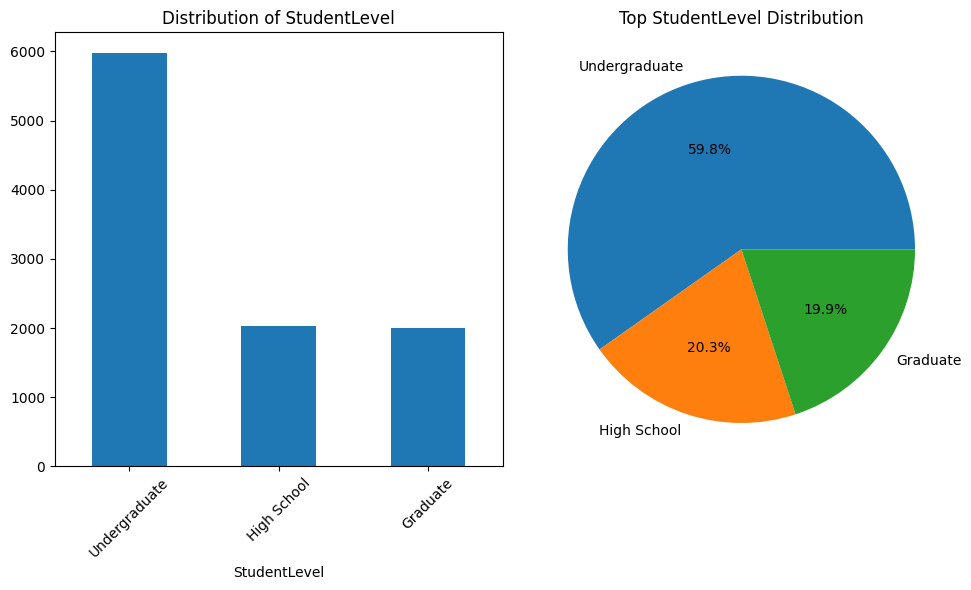


--- Discipline ---
Unique values: 7
Top values:
Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
Name: count, dtype: int64


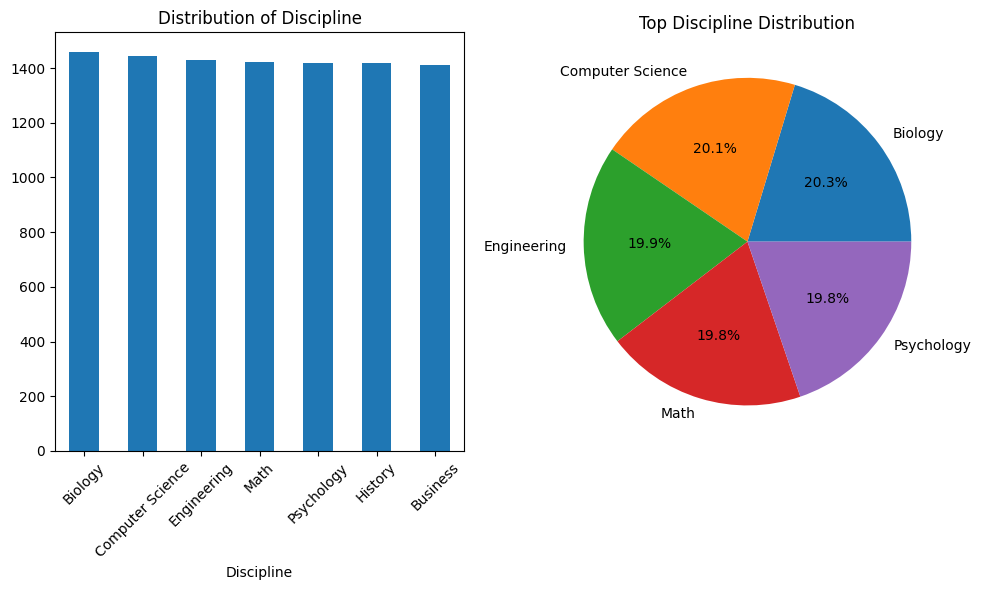


--- SessionDate ---
Unique values: 366
Top values:
SessionDate
2025-01-19    41
2025-06-21    41
2025-04-16    41
2025-04-03    41
2024-08-15    41
Name: count, dtype: int64

--- TaskType ---
Unique values: 6
Top values:
TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Name: count, dtype: int64


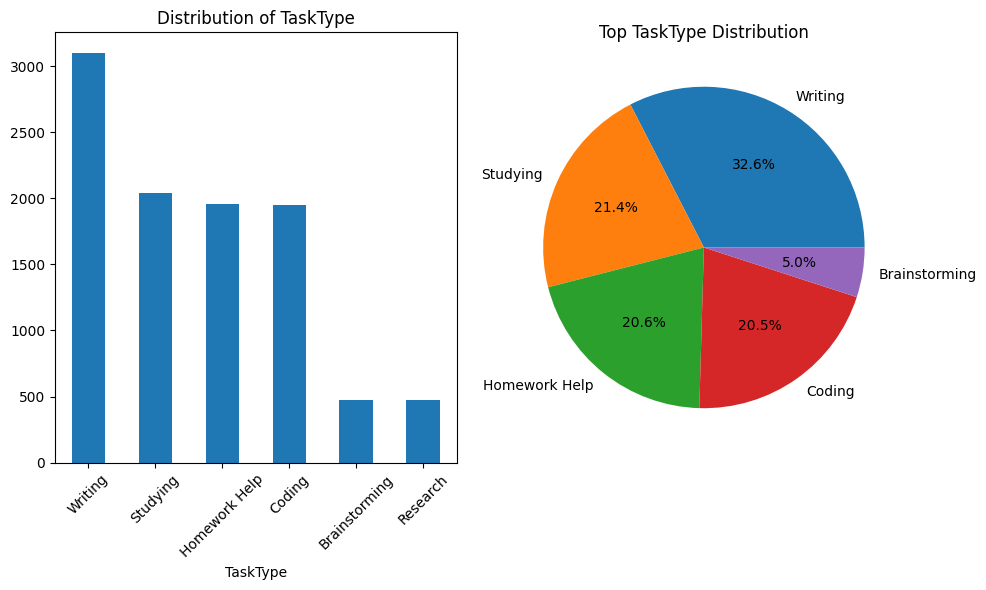


--- FinalOutcome ---
Unique values: 4
Top values:
FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64


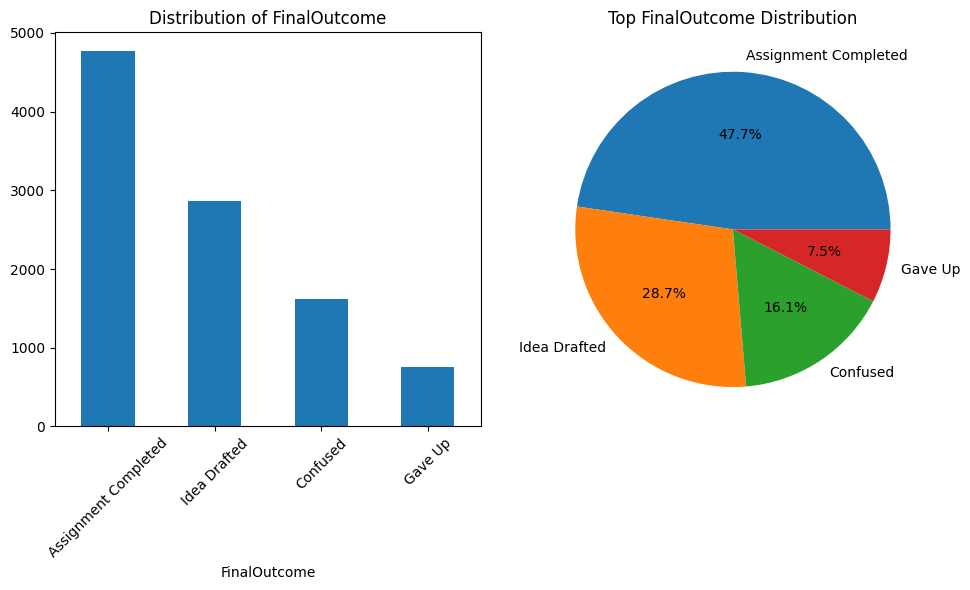


🔢 Numerical Variables Analysis:
       SessionLengthMin  TotalPrompts  AI_AssistanceLevel  SatisfactionRating
count      10000.000000  10000.000000        10000.000000        10000.000000
mean          19.846467      5.607500            3.479500            3.417780
std           13.897302      4.648764            0.991805            1.143331
min            0.030000      1.000000            1.000000            1.000000
25%            9.630000      2.000000            3.000000            2.600000
50%           16.650000      4.000000            4.000000            3.500000
75%           26.670000      8.000000            4.000000            4.400000
max          110.810000     39.000000            5.000000            5.000000


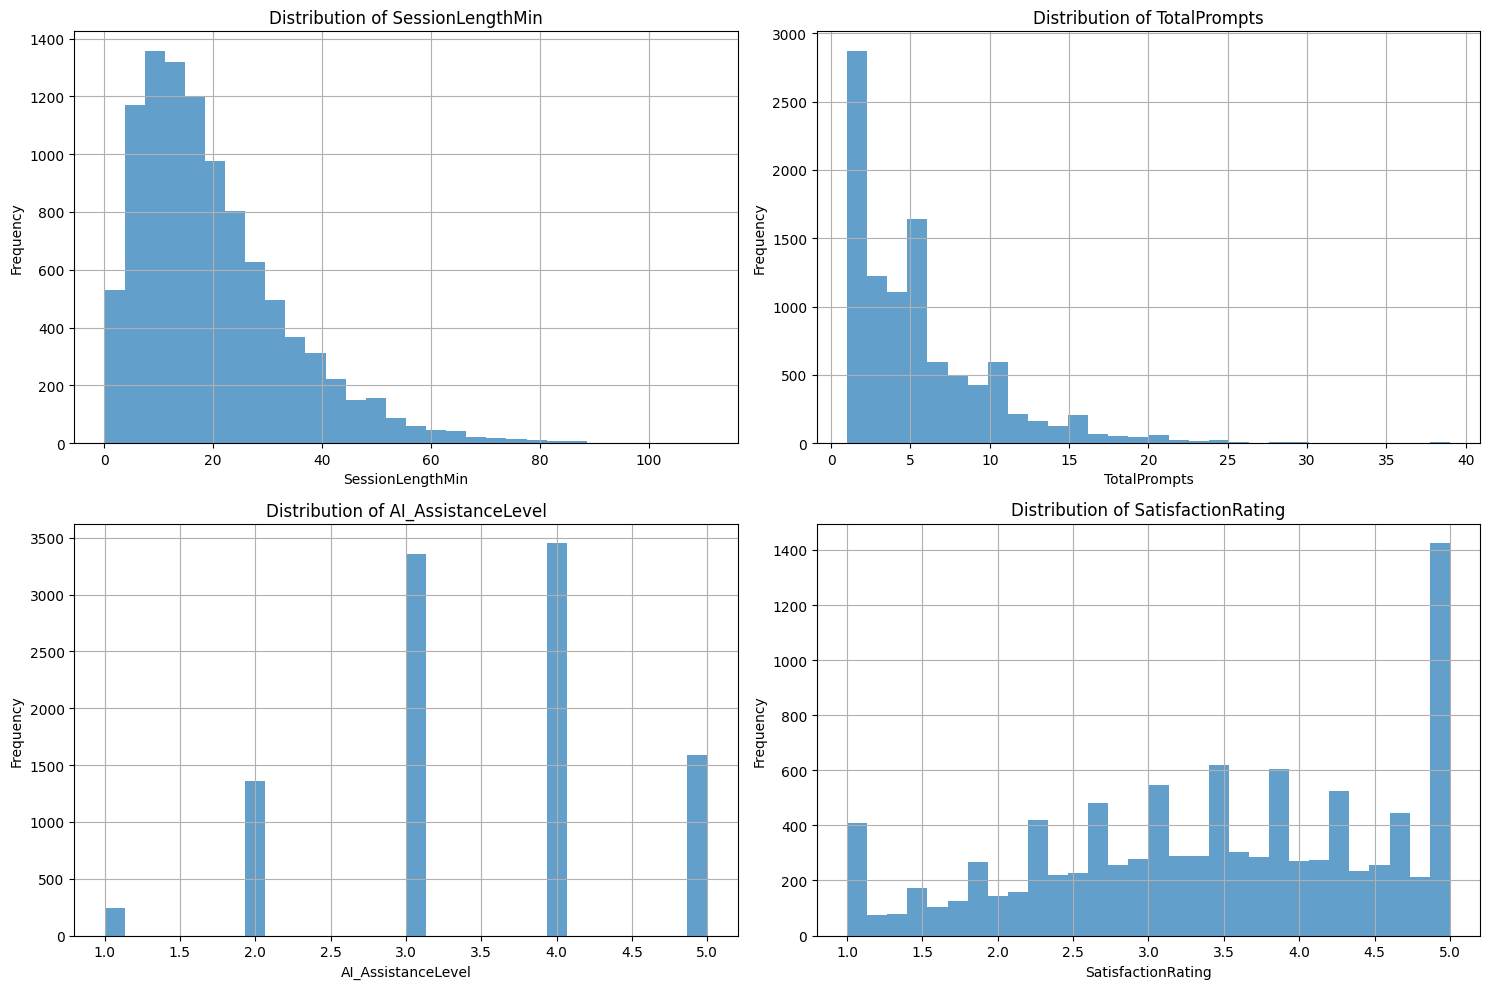

In [5]:
print("\n" + "="*60)
print("📊 UNIVARIATE ANALYSIS")
print("="*60)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📝 Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"🔢 Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Analyze categorical variables
if categorical_cols:
    print("\n🏷️ Categorical Variables Analysis:")
    for col in categorical_cols:
        print(f"\n--- {col} ---")
        value_counts = df[col].value_counts()
        print(f"Unique values: {df[col].nunique()}")
        print("Top values:")
        print(value_counts.head())

        if df[col].nunique() <= 20:  # Only show for reasonable number of categories
            # Create visualization
            plt.figure(figsize=(10, 6))
            plt.subplot(1, 2, 1)
            df[col].value_counts().head(10).plot(kind='bar')
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)

            plt.subplot(1, 2, 2)
            plt.pie(df[col].value_counts().head(5),
                    labels=df[col].value_counts().head(5).index,
                    autopct='%1.1f%%')
            plt.title(f'Top {col} Distribution')

            plt.tight_layout()
            plt.show()

# Analyze numerical variables
if numerical_cols:
    print("\n🔢 Numerical Variables Analysis:")

    # Statistical summary
    print(df[numerical_cols].describe())

    # Distribution plots
    n_cols = len(numerical_cols)
    if n_cols > 0:
        fig, axes = plt.subplots(nrows=(n_cols+1)//2, ncols=2,
                                 figsize=(15, 5*((n_cols+1)//2)))
        if n_cols == 1:
            axes = [axes]
        elif (n_cols+1)//2 == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for i, col in enumerate(numerical_cols):
            if i < len(axes):
                df[col].hist(bins=30, ax=axes[i], alpha=0.7)
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')

        # Hide empty subplots
        for i in range(len(numerical_cols), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()


# **Analisis Bivariat (Student Level)**

Kode **BIVARIATE ANALYSIS** ini digunakan untuk menganalisis hubungan antar variabel, yaitu menghitung dan menampilkan matriks korelasi untuk variabel numerik beserta heatmap-nya, serta membuat cross-tabulation dan visualisasi distribusi (countplot) untuk membandingkan dua variabel kategorikal dengan jumlah kategori yang relatif sedikit.



🔗 BIVARIATE ANALYSIS

--- Bivariate Analysis with StudentLevel ---

Cross-tabulation: StudentLevel vs FinalOutcome


FinalOutcome,Assignment Completed,Confused,Gave Up,Idea Drafted
StudentLevel,,,,
Graduate,936,331,161,567
High School,948,335,147,597
Undergraduate,2884,947,445,1702


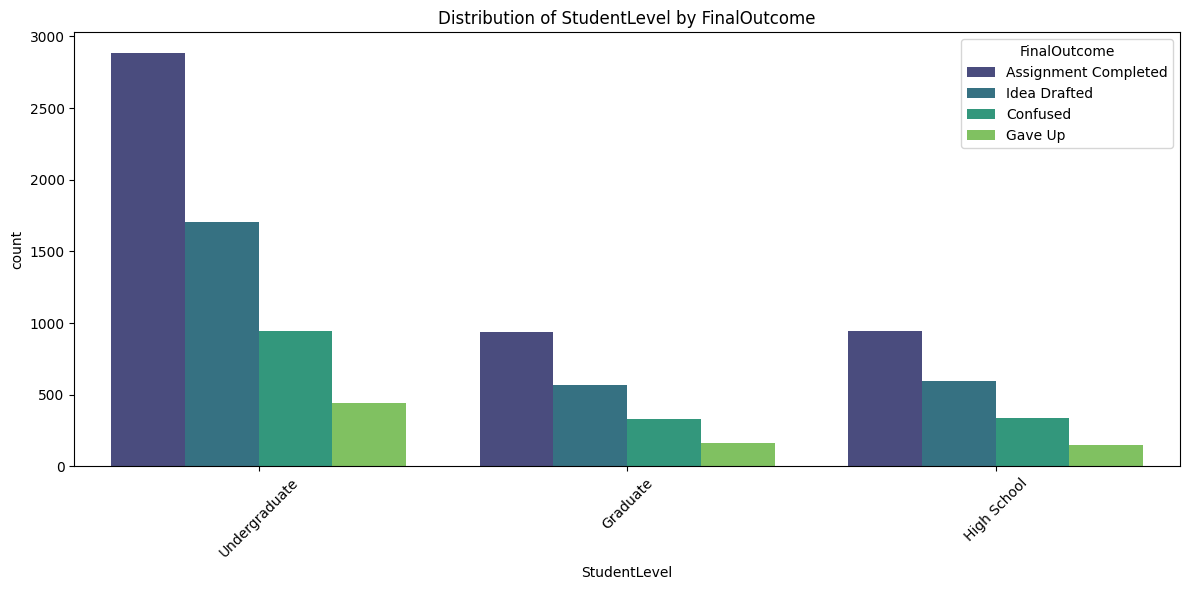


Relationship between StudentLevel and Numerical Variables:

--- StudentLevel vs TotalPrompts ---


,count,mean,std,min,25%,50%,75%,max
StudentLevel,,,,,,,,
Graduate,1995.0,5.787469,4.800111,1.0,2.0,4.0,8.0,31.0
High School,2027.0,5.619142,4.581390,1.0,2.0,4.0,8.0,39.0
Undergraduate,5978.0,5.543493,4.619198,1.0,2.0,4.0,7.0,39.0


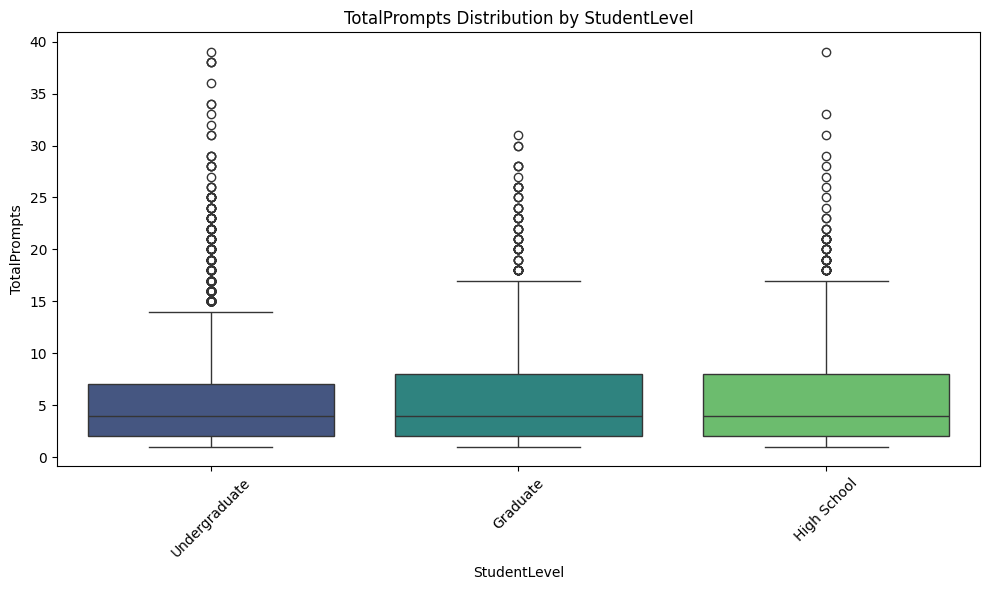


--- StudentLevel vs AI_AssistanceLevel ---


,count,mean,std,min,25%,50%,75%,max
StudentLevel,,,,,,,,
Graduate,1995.0,3.469674,1.004233,1.0,3.0,4.0,4.0,5.0
High School,2027.0,3.477060,0.999428,1.0,3.0,4.0,4.0,5.0
Undergraduate,5978.0,3.483607,0.985158,1.0,3.0,4.0,4.0,5.0


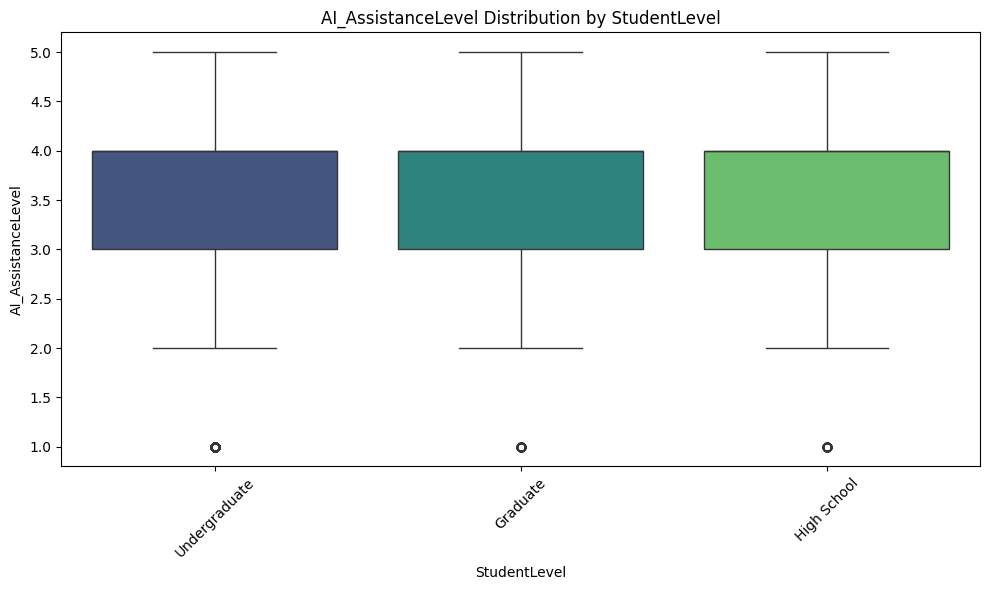


--- StudentLevel vs SatisfactionRating ---


,count,mean,std,min,25%,50%,75%,max
StudentLevel,,,,,,,,
Graduate,1995.0,3.419048,1.146150,1.0,2.6,3.5,4.4,5.0
High School,2027.0,3.428071,1.147746,1.0,2.6,3.5,4.4,5.0
Undergraduate,5978.0,3.413868,1.141057,1.0,2.6,3.5,4.4,5.0


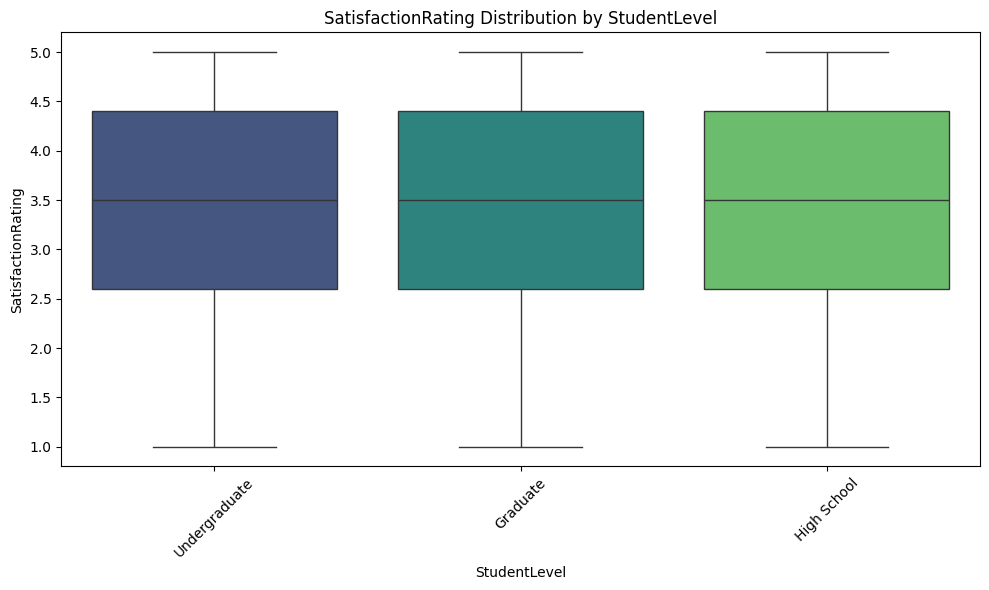


--- StudentLevel vs SessionLengthMin ---


,count,mean,std,min,25%,50%,75%,max
StudentLevel,,,,,,,,
Graduate,1995.0,20.252236,14.247042,0.30,9.71,16.99,27.77,94.50
High School,2027.0,20.023740,14.038279,0.23,9.50,16.63,27.00,91.20
Undergraduate,5978.0,19.650943,13.728693,0.03,9.63,16.52,26.26,110.81


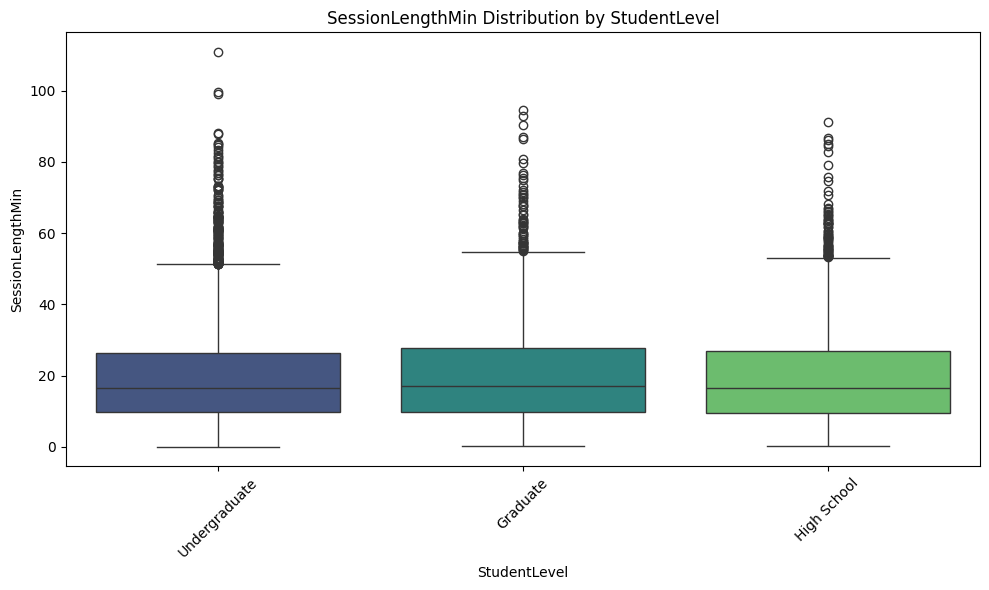


--- Correlation Analysis of Numerical Variables ---

📈 Correlation Matrix:


,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
SessionLengthMin,1.000000,0.902317,-0.006848,-0.011136
TotalPrompts,0.902317,1.000000,-0.006355,-0.009561
AI_AssistanceLevel,-0.006848,-0.006355,1.000000,0.775513
SatisfactionRating,-0.011136,-0.009561,0.775513,1.000000


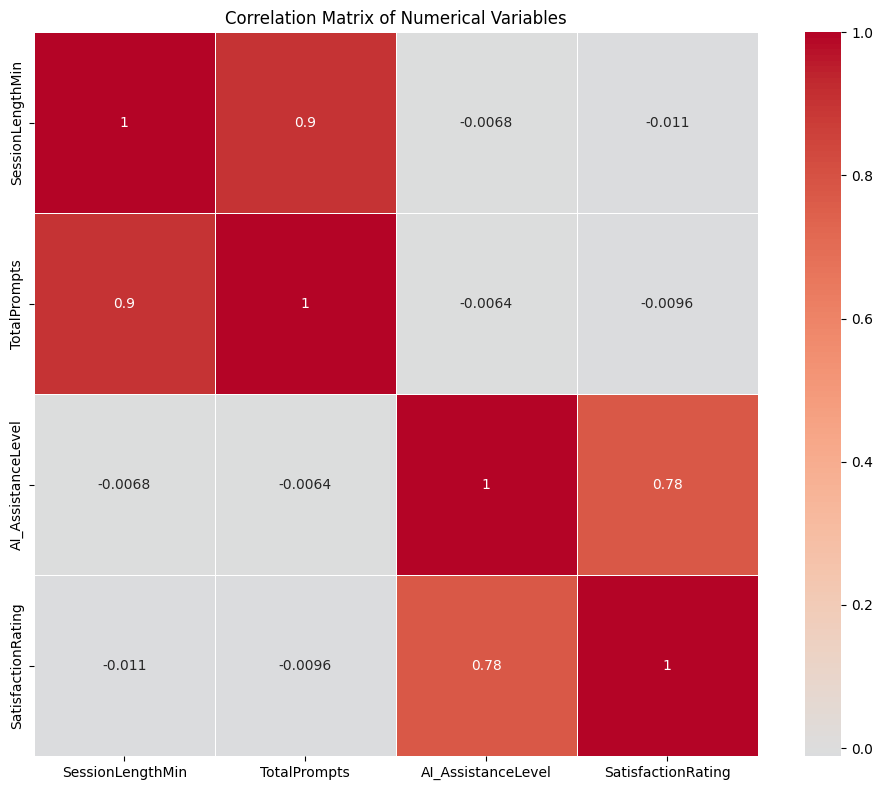

In [6]:
print("\n" + "="*60)
print("🔗 BIVARIATE ANALYSIS")
print("="*60)

# Identify categorical and numerical columns (re-identify in case previous steps changed them)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Bivariate analysis focusing on StudentLevel ---
primary_cat_col = 'StudentLevel'
if primary_cat_col in categorical_cols:
    print(f"\n--- Bivariate Analysis with {primary_cat_col} ---")

    # Relationship with another categorical column (FinalOutcome)
    secondary_cat_col = 'FinalOutcome'
    if secondary_cat_col in categorical_cols and secondary_cat_col != primary_cat_col:
        print(f"\nCross-tabulation: {primary_cat_col} vs {secondary_cat_col}")
        crosstab = pd.crosstab(df[primary_cat_col], df[secondary_cat_col])
        display(crosstab)

        # Visualization
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=primary_cat_col, hue=secondary_cat_col, palette='viridis')
        plt.title(f'Distribution of {primary_cat_col} by {secondary_cat_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Relationship with numerical columns
    selected_numerical_cols = ['TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating', 'SessionLengthMin']
    present_numerical_cols = [col for col in selected_numerical_cols if col in numerical_cols]

    if present_numerical_cols:
        print(f"\nRelationship between {primary_cat_col} and Numerical Variables:")
        for num_col in present_numerical_cols:
            print(f"\n--- {primary_cat_col} vs {num_col} ---")
            # Group by primary_cat_col and describe the numerical column
            grouped_stats = df.groupby(primary_cat_col)[num_col].describe()
            display(grouped_stats)

            # Visualize using boxplot
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=primary_cat_col, y=num_col, palette='viridis')
            plt.title(f'{num_col} Distribution by {primary_cat_col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

else:
    print(f"\n⚠️ Primary categorical column '{primary_cat_col}' not found in dataset.")


# --- Original Correlation analysis for all numerical variables ---
print("\n--- Correlation Analysis of Numerical Variables ---")
if len(numerical_cols) > 1:
    print("\n📈 Correlation Matrix:")
    correlation_matrix = df[numerical_cols].corr()
    display(correlation_matrix)

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
elif len(numerical_cols) == 1:
    print(f"\n📈 Only one numerical column ('{numerical_cols[0]}'), correlation matrix not applicable.")
else:
    print("\n📈 No numerical columns available for correlation analysis.")

# **Analisis Bivariat (Undergraduate Students Discipline)**


🔗 BIVARIATE ANALYSIS

--- Bivariate Analysis for Undergraduate Students by Discipline ---

Cross-tabulation: Discipline vs FinalOutcome (Undergraduate Students)


FinalOutcome,Assignment Completed,Confused,Gave Up,Idea Drafted
Discipline,,,,
Biology,421,144,51,251
Business,423,135,69,237
Computer Science,425,136,71,234
Engineering,417,141,70,235
History,367,135,61,275
Math,436,128,67,241
Psychology,395,128,56,229


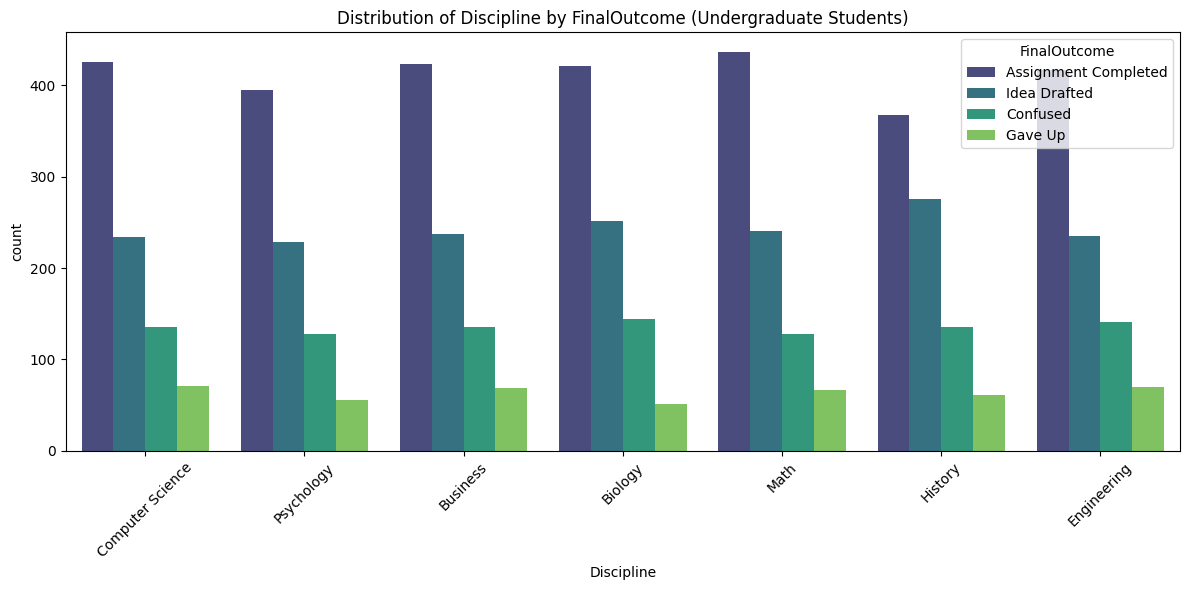


Cross-tabulation: Discipline vs TaskType (Undergraduate Students)


TaskType,Brainstorming,Coding,Homework Help,Research,Studying,Writing
Discipline,,,,,,
Biology,42,184,183,25,184,249
Business,51,160,158,39,179,277
Computer Science,38,173,167,46,185,257
Engineering,42,169,172,34,171,275
History,41,170,151,46,161,269
Math,36,151,178,38,172,297
Psychology,37,169,156,37,164,245


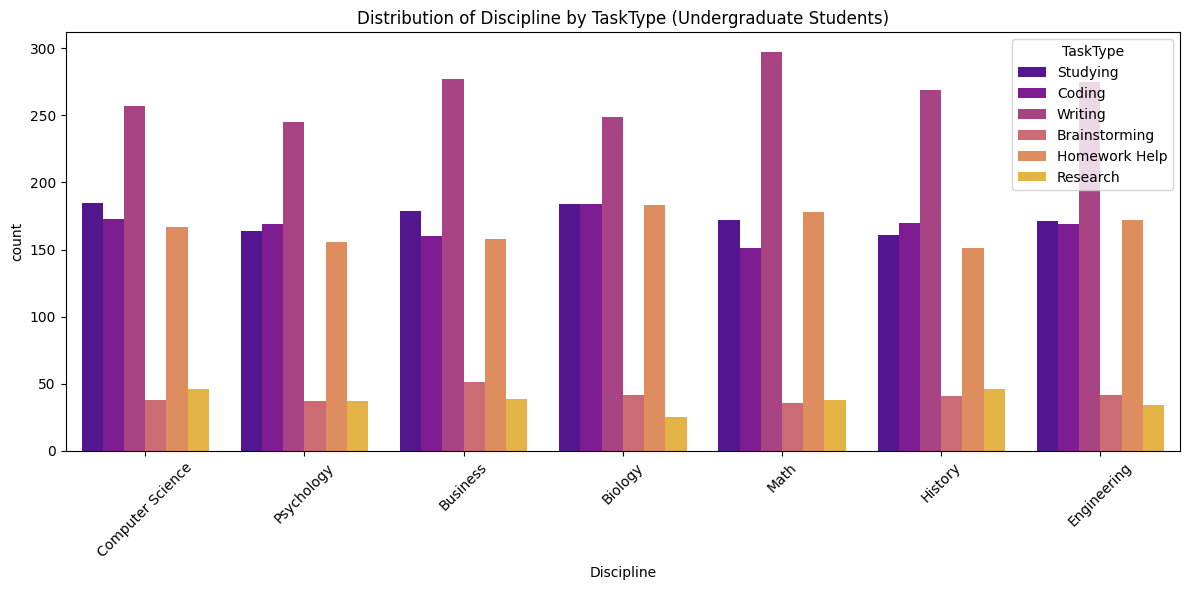


Relationship between Discipline and Numerical Variables (Undergraduate Students):

--- Discipline vs TotalPrompts (Undergraduate Students) ---


,count,mean,std,min,25%,50%,75%,max
Discipline,,,,,,,,
Biology,867.0,5.487889,4.930536,1.0,2.0,4.0,7.0,39.0
Business,864.0,5.517361,4.650190,1.0,2.0,4.0,7.0,38.0
Computer Science,866.0,5.546189,4.821034,1.0,2.0,4.0,7.0,38.0
Engineering,863.0,5.640788,4.479736,1.0,2.0,4.0,8.0,25.0
History,838.0,5.546539,4.517282,1.0,2.0,4.0,7.0,29.0
Math,872.0,5.416284,4.262604,1.0,2.0,4.0,7.0,28.0
Psychology,808.0,5.658416,4.652979,1.0,2.0,4.0,8.0,38.0


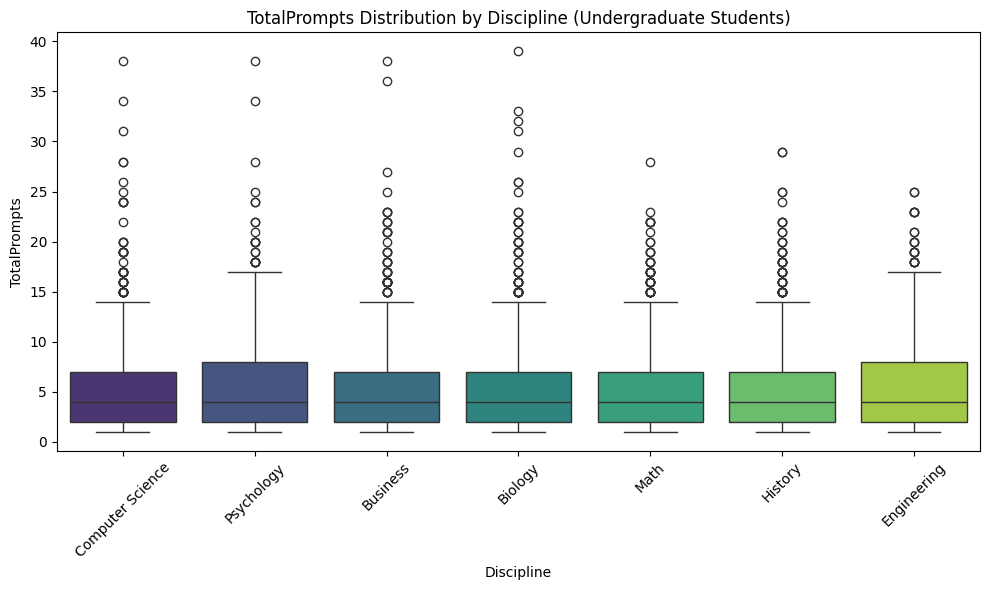


--- Discipline vs AI_AssistanceLevel (Undergraduate Students) ---


,count,mean,std,min,25%,50%,75%,max
Discipline,,,,,,,,
Biology,867.0,3.477509,1.004787,1.0,3.0,4.0,4.0,5.0
Business,864.0,3.478009,0.970947,1.0,3.0,4.0,4.0,5.0
Computer Science,866.0,3.486143,0.973839,1.0,3.0,4.0,4.0,5.0
Engineering,863.0,3.472769,0.975994,1.0,3.0,3.0,4.0,5.0
History,838.0,3.494033,0.995492,1.0,3.0,3.0,4.0,5.0
Math,872.0,3.502294,1.016509,1.0,3.0,4.0,4.0,5.0
Psychology,808.0,3.474010,0.958529,1.0,3.0,3.0,4.0,5.0


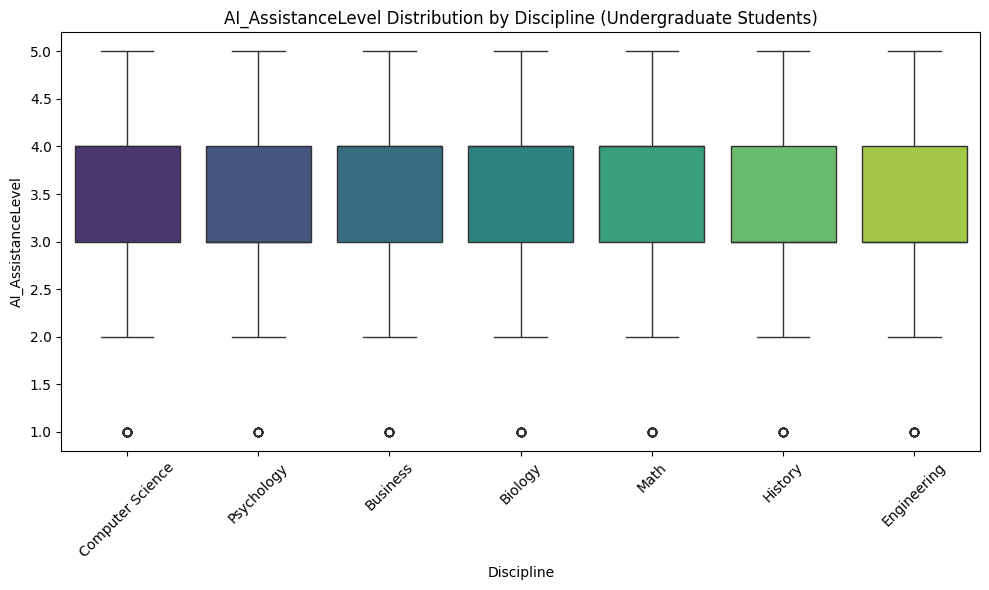


--- Discipline vs SatisfactionRating (Undergraduate Students) ---


,count,mean,std,min,25%,50%,75%,max
Discipline,,,,,,,,
Biology,867.0,3.426067,1.145082,1.0,2.6,3.5,4.400,5.0
Business,864.0,3.383796,1.108784,1.0,2.6,3.4,4.300,5.0
Computer Science,866.0,3.425866,1.150301,1.0,2.6,3.5,4.400,5.0
Engineering,863.0,3.387022,1.140173,1.0,2.6,3.5,4.300,5.0
History,838.0,3.400000,1.149276,1.0,2.6,3.5,4.375,5.0
Math,872.0,3.429358,1.174885,1.0,2.6,3.5,4.500,5.0
Psychology,808.0,3.446411,1.118599,1.0,2.7,3.5,4.300,5.0


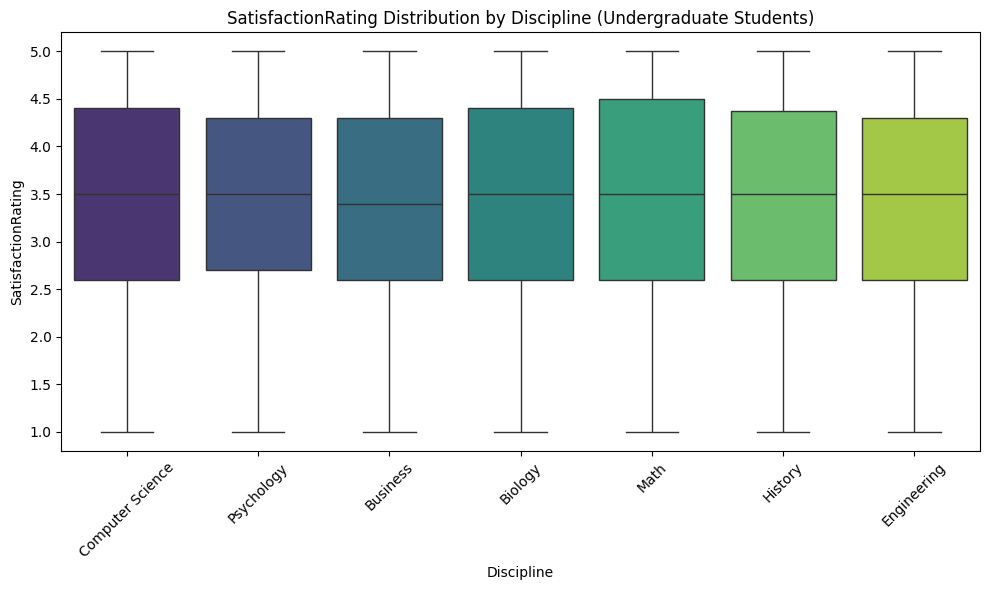


--- Correlation Analysis of All Numerical Variables ---

📈 Correlation Matrix:


,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
SessionLengthMin,1.000000,0.902317,-0.006848,-0.011136
TotalPrompts,0.902317,1.000000,-0.006355,-0.009561
AI_AssistanceLevel,-0.006848,-0.006355,1.000000,0.775513
SatisfactionRating,-0.011136,-0.009561,0.775513,1.000000


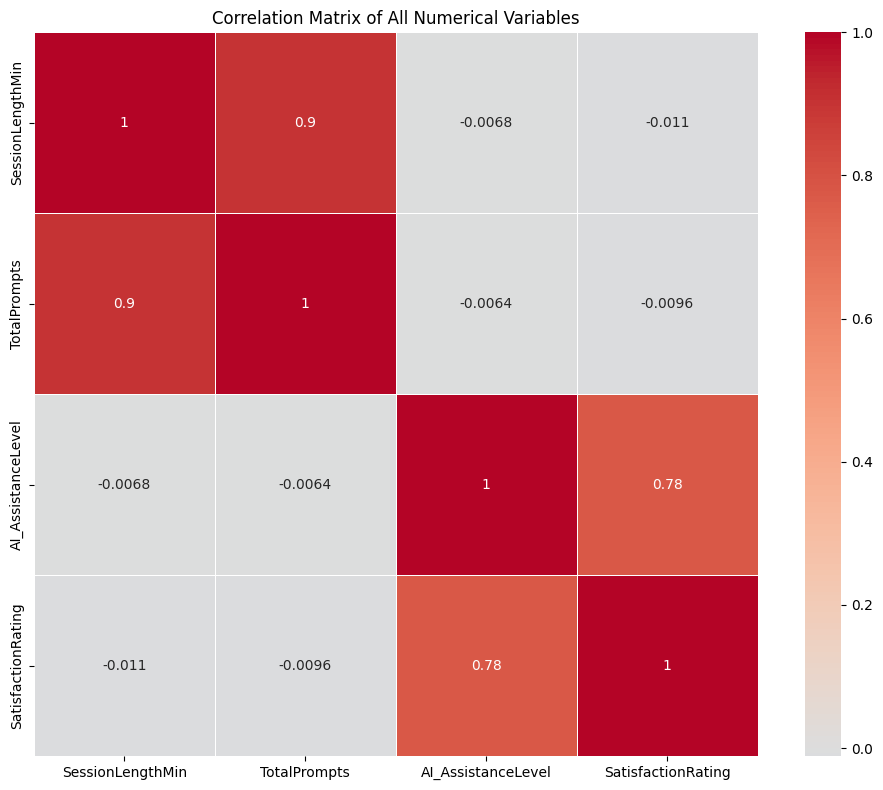

In [7]:
print("\n" + "="*60)
print("🔗 BIVARIATE ANALYSIS")
print("="*60)

# Identify categorical and numerical columns (re-identify in case previous steps changed them)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Bivariate analysis focusing on Undergraduate Student Discipline ---
undergraduate_df = df[df['StudentLevel'] == 'Undergraduate'].copy()
primary_cat_col = 'Discipline'

if primary_cat_col in undergraduate_df.columns:
    print(f"\n--- Bivariate Analysis for Undergraduate Students by {primary_cat_col} ---")

    # 1. Relationship with another categorical column (FinalOutcome)
    secondary_cat_col = 'FinalOutcome'
    if secondary_cat_col in undergraduate_df.columns and secondary_cat_col != primary_cat_col:
        print(f"\nCross-tabulation: {primary_cat_col} vs {secondary_cat_col} (Undergraduate Students)")
        crosstab = pd.crosstab(undergraduate_df[primary_cat_col], undergraduate_df[secondary_cat_col])
        display(crosstab)

        # Visualization
        plt.figure(figsize=(12, 6))
        sns.countplot(data=undergraduate_df, x=primary_cat_col, hue=secondary_cat_col, palette='viridis')
        plt.title(f'Distribution of {primary_cat_col} by {secondary_cat_col} (Undergraduate Students)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # 2. Relationship with another categorical column (TaskType)
    secondary_cat_col = 'TaskType'
    if secondary_cat_col in undergraduate_df.columns and secondary_cat_col != primary_cat_col:
        print(f"\nCross-tabulation: {primary_cat_col} vs {secondary_cat_col} (Undergraduate Students)")
        crosstab = pd.crosstab(undergraduate_df[primary_cat_col], undergraduate_df[secondary_cat_col])
        display(crosstab)

        # Visualization
        plt.figure(figsize=(12, 6))
        sns.countplot(data=undergraduate_df, x=primary_cat_col, hue=secondary_cat_col, palette='plasma')
        plt.title(f'Distribution of {primary_cat_col} by {secondary_cat_col} (Undergraduate Students)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # 3. Relationship with numerical columns
    selected_numerical_cols = ['TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']
    present_numerical_cols = [col for col in selected_numerical_cols if col in numerical_cols] # Check against original numerical_cols

    if present_numerical_cols:
        print(f"\nRelationship between {primary_cat_col} and Numerical Variables (Undergraduate Students):")
        for num_col in present_numerical_cols:
            print(f"\n--- {primary_cat_col} vs {num_col} (Undergraduate Students) ---")
            # Group by primary_cat_col and describe the numerical column
            grouped_stats = undergraduate_df.groupby(primary_cat_col)[num_col].describe()
            display(grouped_stats)

            # Visualize using boxplot
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=undergraduate_df, x=primary_cat_col, y=num_col, palette='viridis')
            plt.title(f'{num_col} Distribution by {primary_cat_col} (Undergraduate Students)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

else:
    print(f"\n⚠️ Primary categorical column '{primary_cat_col}' not found in the filtered dataset.")


# --- Original Correlation analysis for all numerical variables---
print("\n--- Correlation Analysis of All Numerical Variables ---")
if len(numerical_cols) > 1:
    print("\n📈 Correlation Matrix:")
    correlation_matrix = df[numerical_cols].corr()
    display(correlation_matrix)

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of All Numerical Variables')
    plt.tight_layout()
    plt.show()
elif len(numerical_cols) == 1:
    print(f"\n📈 Only one numerical column ('{numerical_cols[0]}'), correlation matrix not applicable.")
else:
    print("\n📈 No numerical columns available for correlation analysis.")


# **Analisis Bivariat (Satisfaction Rating vs FinalOutcome)**


🔗 BIVARIATE ANALYSIS: Satisfaction Rating vs FinalOutcome

📊 Satisfaction Rating Statistics by Final Outcome:


,count,mean,std,min,25%,50%,75%,max
FinalOutcome,,,,,,,,
Assignment Completed,4768.0,3.430474,1.139346,1.0,2.6,3.5,4.4,5.0
Confused,1613.0,3.446311,1.140505,1.0,2.6,3.5,4.4,5.0
Gave Up,753.0,3.357105,1.135761,1.0,2.5,3.4,4.3,5.0
Idea Drafted,2866.0,3.396546,1.153139,1.0,2.5,3.5,4.3,5.0


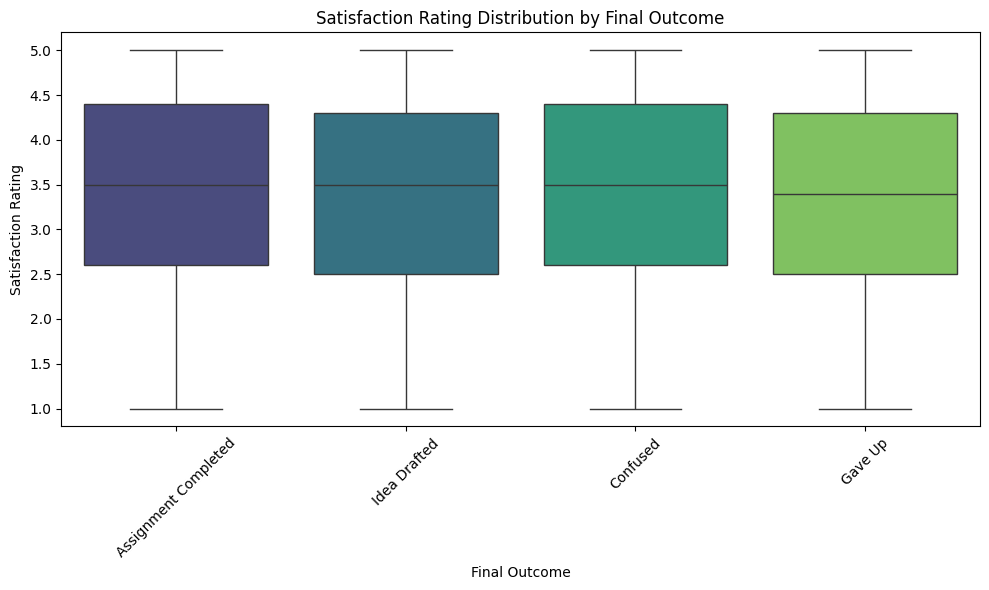

In [8]:
print("\n" + "="*60)
print("🔗 BIVARIATE ANALYSIS: Satisfaction Rating vs FinalOutcome")
print("="*60)

# Group by FinalOutcome and describe SatisfactionRating
if 'FinalOutcome' in df.columns and 'SatisfactionRating' in df.columns:
    print("\n📊 Satisfaction Rating Statistics by Final Outcome:")
    grouped_stats = df.groupby('FinalOutcome')['SatisfactionRating'].describe()
    display(grouped_stats)

    # Visualize the relationship using boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='FinalOutcome', y='SatisfactionRating', palette='viridis')
    plt.title('Satisfaction Rating Distribution by Final Outcome')
    plt.xlabel('Final Outcome')
    plt.ylabel('Satisfaction Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    # Optional: Violin plot for more detail on distribution shape
    # plt.figure(figsize=(10, 6))
    # sns.violinplot(data=df, x='FinalOutcome', y='SatisfactionRating', palette='viridis')
    # plt.title('Satisfaction Rating Distribution by Final Outcome')
    # plt.xlabel('Final Outcome')
    # plt.ylabel('Satisfaction Rating')
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()

else:
    print("\n⚠️ Required columns ('FinalOutcome' or 'SatisfactionRating') not found in the dataset.")

# **DATA PREPROCESSINNG**


---



# **Data Quality Assessment**

Kode **DATA QUALITY ASSESSMENT** ini digunakan untuk mengevaluasi kualitas dataset dengan memeriksa beberapa aspek penting, yaitu: menampilkan judul dan garis pemisah agar output rapi, menganalisis nilai yang hilang (missing values) dengan menghitung jumlah dan persentasenya untuk setiap kolom serta menampilkan detail kolom yang memiliki nilai kosong, memberikan informasi apakah dataset bebas dari nilai hilang atau tidak, memeriksa duplikasi baris dengan menghitung jumlah baris yang sama persis serta persentasenya, dan menampilkan distribusi tipe data untuk mengetahui komposisi jenis variabel di dataset.

In [9]:
print("\n" + "="*60)
print("🔍 DATA QUALITY ASSESSMENT")
print("="*60)

# Missing values
print("\n❓ Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
}).round(2)

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Total missing values: {missing_df['Missing_Count'].sum()}")

# Duplicate values
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"⚠️ {duplicates} duplicate rows found ({duplicates/len(df)*100:.2f}%)")
else:
    print("✅ No duplicate rows found!")

# Data types
print("\n📊 Data Types Distribution:")
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)


🔍 DATA QUALITY ASSESSMENT

❓ Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
✅ No missing values found!

🔄 Duplicate rows: 0
✅ No duplicate rows found!

📊 Data Types Distribution:
object     6
float64    2
int64      2
bool       1
Name: count, dtype: int64


## **Data Cleaning**

Kode ini melakukan proses **pembersihan data** yang mencakup tiga tahap utama:

1. **Menangani nilai hilang**

   * Mengidentifikasi kolom yang memiliki missing values.
   * Mengisi nilai hilang berdasarkan tipe data dan persentasenya:

     * Data kategorikal/teks diisi dengan *mode* atau `"Unknown"`.
     * Data numerik diisi dengan *median*.
     * Kolom dengan terlalu banyak nilai hilang diberi catatan untuk dipertimbangkan dihapus.

2. **Menghapus duplikat**

   * Menghitung jumlah baris duplikat sebelum dan sesudah pembersihan.
   * Menghapus baris duplikat jika ditemukan.

3. **Optimisasi tipe data**

   * Mengubah kolom bertipe *object* menjadi *category* jika proporsi nilai uniknya kecil (<10%).

Hasil akhir menampilkan bentuk dataset setelah pembersihan, termasuk perubahan jumlah baris, kolom, dan distribusi tipe data.


In [10]:
print("\n" + "="*60)
print("🧹 DATA CLEANING")
print("="*60)

# Original dataset info
print(f"Original dataset shape: {df.shape}")

# 1. Handle missing values
print("\n❓ Missing Values Handling:")
missing_before = df.isnull().sum().sum()
print(f"Missing values before cleaning: {missing_before}")

# Identify missing patterns
missing_data = df.isnull().sum()
missing_cols = missing_data[missing_data > 0].index.tolist()

if missing_cols:
    print(f"Columns with missing values: {missing_cols}")

    for col in missing_cols:
        missing_count = df[col].isnull().sum()
        missing_percent = (missing_count / len(df)) * 100
        print(f"  - {col}: {missing_count} ({missing_percent:.2f}%)")

        if df[col].dtype == 'object':
            # For categorical/text data, fill with 'Unknown' or mode
            if missing_percent < 10:
                mode_val = df[col].mode()
                if len(mode_val) > 0:
                    df[col].fillna(mode_val[0], inplace=True)
                    print(f"    → Filled with mode: {mode_val[0]}")
                else:
                    df[col].fillna('Unknown', inplace=True)
                    print(f"    → Filled with 'Unknown'")
            else:
                df[col].fillna('Unknown', inplace=True)
                print(f"    → Filled with 'Unknown'")
        else:
            # For numerical data, fill with median
            if missing_percent < 10:
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"    → Filled with median: {median_val}")
            else:
                # If too many missing, consider dropping the column
                print(f"    → Too many missing values ({missing_percent:.2f}%), consider dropping")

missing_after = df.isnull().sum().sum()
print(f"\nMissing values after cleaning: {missing_after}")

# 2. Handle duplicates
print("\n🔄 Duplicate Handling:")
duplicates_before = df.duplicated().sum()
print(f"Duplicates before: {duplicates_before}")

if duplicates_before > 0:
    df = df.drop_duplicates()
    duplicates_after = df.duplicated().sum()
    print(f"Duplicates after: {duplicates_after}")
    print(f"Rows removed: {duplicates_before}")

# 3. Data type optimization
print("\n📊 Data Type Optimization:")
print("Before optimization:")
print(df.dtypes.value_counts())

# Convert appropriate columns to categorical
for col in df.columns:
    if df[col].dtype == 'object':
        unique_ratio = df[col].nunique() / len(df)
        if unique_ratio < 0.1:  # If less than 10% unique values, make categorical
            df[col] = df[col].astype('category')
            print(f"  - {col} converted to category ({df[col].nunique()} unique values)")

print("\nAfter optimization:")
print(df.dtypes.value_counts())

print(f"\n✅ Dataset shape after cleaning: {df.shape}")


🧹 DATA CLEANING
Original dataset shape: (10000, 11)

❓ Missing Values Handling:
Missing values before cleaning: 0

Missing values after cleaning: 0

🔄 Duplicate Handling:
Duplicates before: 0

📊 Data Type Optimization:
Before optimization:
object     6
float64    2
int64      2
bool       1
Name: count, dtype: int64
  - StudentLevel converted to category (3 unique values)
  - Discipline converted to category (7 unique values)
  - SessionDate converted to category (366 unique values)
  - TaskType converted to category (6 unique values)
  - FinalOutcome converted to category (4 unique values)

After optimization:
float64     2
int64       2
object      1
category    1
category    1
category    1
category    1
category    1
bool        1
Name: count, dtype: int64

✅ Dataset shape after cleaning: (10000, 11)


## **Target Variable Preparation**

Kode tersebut berfungsi untuk **menampilkan daftar fitur kategorikal dan numerik dalam dataset**, lalu **meminta pengguna memilih target variable** yang akan digunakan dalam analisis atau pemodelan.


* Menampilkan **fitur kategorikal** beserta jumlah nilai uniknya.
* Menampilkan **fitur numerik**.
* Menggabungkan semua kolom menjadi satu daftar untuk dipilih.
* Meminta input pengguna berupa **nomor kolom target** dengan validasi agar sesuai rentang daftar.
* Menyimpan kolom yang dipilih sebagai `target_col` dan menampilkan distribusi kelasnya.


In [29]:
print("\n" + "="*60)
print("🎯 TARGET VARIABLE PREPARATION")
print("="*60)

# Tambahkan SessionLengthMin ke excluded_cols agar tidak bisa dipilih
excluded_cols = ['SessionID', 'SessionDate', 'SessionLengthMin']

# Semua fitur yang bisa dipilih sebagai target
all_features = [col for col in categorical_cols + numerical_cols if col not in excluded_cols]

# Pisahkan lagi ke kategori masing-masing (untuk display saja)
categorical_display = [col for col in categorical_cols if col not in excluded_cols]
numerical_display = [col for col in numerical_cols if col not in excluded_cols]

# Menampilkan Categorical Features
print("\n📊 Categorical Features:")
cat_table = [(i+1, col, df[col].nunique()) for i, col in enumerate(categorical_display)]
print(tabulate(cat_table, headers=["No", "Column", "Unique"], tablefmt="fancy_grid"))

# Menampilkan Numerical Features
print("\n📈 Numerical Features:")
num_table = [(i+1+len(categorical_display), col, "Numeric") for i, col in enumerate(numerical_display)]
print(tabulate(num_table, headers=["No", "Column", "Type"], tablefmt="fancy_grid"))

# Interaktif memilih target variable
print("\n🎯 Please select your target variable by number from the list above.")

while True:
    try:
        choice = int(input("Enter the number of your target column: "))
        if 1 <= choice <= len(all_features):
            target_col = all_features[choice - 1]
            break
        else:
            print(f"⚠️ Please enter a number between 1 and {len(all_features)}.")
    except ValueError:
        print("⚠️ Invalid input. Please enter a number.")

print(f"\n✅ Target variable set to: {target_col}")
print(f"Target classes:\n{df[target_col].value_counts()}")



🎯 TARGET VARIABLE PREPARATION

📊 Categorical Features:
╒══════╤══════════════╤══════════╕
│   No │ Column       │   Unique │
╞══════╪══════════════╪══════════╡
│    1 │ StudentLevel │        3 │
├──────┼──────────────┼──────────┤
│    2 │ Discipline   │        7 │
├──────┼──────────────┼──────────┤
│    3 │ TaskType     │        6 │
├──────┼──────────────┼──────────┤
│    4 │ FinalOutcome │        4 │
╘══════╧══════════════╧══════════╛

📈 Numerical Features:
╒══════╤════════════════════╤═════════╕
│   No │ Column             │ Type    │
╞══════╪════════════════════╪═════════╡
│    5 │ TotalPrompts       │ Numeric │
├──────┼────────────────────┼─────────┤
│    6 │ AI_AssistanceLevel │ Numeric │
├──────┼────────────────────┼─────────┤
│    7 │ SatisfactionRating │ Numeric │
╘══════╧════════════════════╧═════════╛

🎯 Please select your target variable by number from the list above.
Enter the number of your target column: 6

✅ Target variable set to: AI_AssistanceLevel
Target classes:
AI_

## **FEATURE ENGINEERING**

### ⚙️ FEATURE ENGINEERING

Tahap ini mempersiapkan data menjadi bentuk yang siap digunakan untuk pemodelan klasifikasi. Prosesnya meliputi:

1. **Identifikasi Fitur Kategorikal**

   * Mengambil semua kolom kategorikal kecuali kolom target.

2. **Encoding Fitur Kategorikal**

   * **One-Hot Encoding** digunakan jika jumlah kategori ≤ 10.
   * **Label Encoding** digunakan jika jumlah kategori > 10 untuk menghindari ledakan jumlah fitur.

3. **Normalisasi Fitur Numerik**

   * Menggunakan `StandardScaler` agar semua fitur numerik memiliki skala yang sama (*mean* = 0, *std* = 1).

4. **Membentuk Matriks Fitur**

   * Semua hasil encoding dan scaling digabung menjadi satu *feature matrix* `X`.

5. **Encoding Target**

   * Target diubah menjadi bentuk numerik menggunakan `LabelEncoder`.

6. **Pembersihan Data**

   * Mengganti semua nilai kosong (`NaN`) dan nilai tak hingga (`±inf`) menjadi `0` untuk mencegah error saat training.

Hasil akhir adalah matriks fitur `X` dan label target `y` yang sudah bersih, terstandarisasi, dan siap digunakan untuk pelatihan model.



In [30]:
print("\n" + "="*60)
print("⚙️ FEATURE ENGINEERING")
print("="*60)

# Prepare features
feature_dfs = []
feature_summary = []  # Untuk menyimpan ringkasan dalam tabel

# Pastikan SessionID dan SessionLengthMin tidak ikut di-encode/scale
exclude_cols = ["SessionID", "SessionLengthMin", "SessionDate"]

# 1. Encode categorical features (except target dan excluded columns)
categorical_features = [col for col in categorical_cols if col != target_col and col not in exclude_cols]
numerical_features = [col for col in numerical_cols if col not in exclude_cols]

print(f"📝 Categorical features to encode: {categorical_features}")
print(f"📝 Numerical features to encode: {numerical_features}")

for col in categorical_features:
    unique_count = df[col].nunique()
    if unique_count <= 10:
        # One-hot encoding
        encoded = pd.get_dummies(df[col], prefix=col, drop_first=True)
        feature_dfs.append(encoded)
        feature_summary.append({
            "Feature Name": col,
            "Type": "Categorical",
            "Encoding": "One-hot",
            "Generated Features": encoded.shape[1]
        })
    else:
        # Label encoding for high cardinality
        le = LabelEncoder()
        encoded_series = pd.Series(le.fit_transform(df[col].astype(str)),
                                   name=f"{col}_encoded", index=df.index)
        feature_dfs.append(pd.DataFrame(encoded_series))
        feature_summary.append({
            "Feature Name": col,
            "Type": "Categorical",
            "Encoding": "Label",
            "Generated Features": 1
        })

# 2. Scale numerical features (tanpa SessionLengthMin)
if numerical_features:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[numerical_features])
    scaled_df = pd.DataFrame(scaled_data,
                             columns=[f"{col}_scaled" for col in numerical_features],
                             index=df.index)
    feature_dfs.append(scaled_df)
    feature_summary.append({
        "Feature Name": ", ".join(numerical_features),
        "Type": "Numerical",
        "Encoding": "Standard Scaler",
        "Generated Features": len(numerical_features)
    })

# 3. Create feature matrix
if feature_dfs:
    X = pd.concat(feature_dfs, axis=1)
else:
    X = df[numerical_features] if numerical_features else pd.DataFrame(index=df.index)

# Process the feature matrix
X_processed = X.copy()

# Prepare target
le_target = LabelEncoder()
y = le_target.fit_transform(df[target_col])
target_classes = le_target.classes_

# Handle NaN or inf in the final feature matrix X_processed
X_processed = X_processed.fillna(0)
X_processed = X_processed.replace([np.inf, -np.inf], 0)

# Summary table
summary_df = pd.DataFrame(feature_summary)
display(summary_df)

print(colored(f"✅ Feature matrix created: {X_processed.shape[0]} samples × {X_processed.shape[1]} features", "green"))
print(colored(f"🎯 Target encoded: {len(target_classes)} classes ({', '.join(map(str, target_classes))})", "yellow"))



⚙️ FEATURE ENGINEERING
📝 Categorical features to encode: ['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome']
📝 Numerical features to encode: ['TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']


,Feature Name,Type,Encoding,Generated Features
0,StudentLevel,Categorical,One-hot,2
1,Discipline,Categorical,One-hot,6
2,TaskType,Categorical,One-hot,5
3,FinalOutcome,Categorical,One-hot,3
4,"TotalPrompts, AI_AssistanceLevel, Satisfaction...",Numerical,Standard Scaler,3


✅ Feature matrix created: 10000 samples × 19 features
🎯 Target encoded: 5 classes (1, 2, 3, 4, 5)


# **TRAIN-TEST SPLIT**


---

### 📊 TRAIN-TEST SPLIT

Tahap ini membagi dataset menjadi dua bagian: **training set** dan **test set**.

1. **Pembagian Data**

   * Proporsi: **80% data untuk training**, **20% untuk testing**.
   * Menggunakan parameter `stratify=y` agar distribusi kelas target tetap seimbang di kedua set.

2. **Informasi Dataset**

   * Menampilkan jumlah sampel di *training set* dan *test set*.
   * Menampilkan jumlah fitur (*columns*) yang digunakan.

3. **Distribusi Kelas**

   * Mengecek sebaran jumlah data per kelas di *training set* dan *test set* untuk memastikan tidak ada ketimpangan distribusi.

Hasilnya adalah `X_train`, `X_test`, `y_train`, dan `y_test` yang siap dipakai untuk proses pelatihan dan evaluasi model.


In [31]:
print("\n" + "="*60)
print("📊 TRAIN-TEST SPLIT")
print("="*60)

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

train, xtest, ytrain, ytest = train_test_split(X, y.iloc[:,1], test_size=1/3,
  random_state=85, stratify=y.iloc[:,1])

# Ringkasan ukuran dataset
split_summary = pd.DataFrame({
    "Set": ["Train", "Test"],
    "Samples": [X_train.shape[0], X_test.shape[0]],
    "Features": [X_train.shape[1], X_test.shape[1]]
})

display(split_summary)

# Distribusi kelas
train_dist = pd.Series(y_train).value_counts()
test_dist = pd.Series(y_test).value_counts()

class_summary = pd.DataFrame({
    "Class Name": target_classes,
    "Train Count": [train_dist.get(i, 0) for i in range(len(target_classes))],
    "Test Count": [test_dist.get(i, 0) for i in range(len(target_classes))]
})

display(class_summary)



📊 TRAIN-TEST SPLIT


,Set,Samples,Features
0,Train,8000,19
1,Test,2000,19


,Class Name,Train Count,Test Count
0,1,193,48
1,2,1085,271
2,3,2689,672
3,4,2761,690
4,5,1272,319


# **Data Validation**

Kode ini melakukan **validasi akhir data** sebelum digunakan untuk pemodelan, dengan langkah-langkah:

1. **Pemeriksaan nilai tak hingga (infinite values)**

   * Mengecek apakah ada nilai `∞` atau `-∞` di fitur numerik.
   * Jika ada, nilainya diganti menjadi `NaN` lalu diisi dengan `0`.

2. **Pemeriksaan nilai kosong (NaN)**

   * Mengecek apakah ada nilai `NaN` di data yang sudah diproses.
   * Jika ditemukan, semua `NaN` diisi dengan `0`.

3. **Ringkasan statistik fitur**

   * Menampilkan ukuran matriks fitur (`shape`).
   * Menghitung penggunaan memori.
   * Menyajikan jumlah masing-masing tipe data yang digunakan.


In [32]:
print("\n" + "="*60)
print("✅ DATA VALIDATION")
print("="*60)

# Check for any remaining issues
print("Final data validation:")

# 1. Check for infinite values
if X_processed.select_dtypes(include=[np.number]).isin([np.inf, -np.inf]).any().any():
    print("⚠️ Infinite values found in features")
    # Replace infinite values
    X_processed = X_processed.replace([np.inf, -np.inf], np.nan)
    X_processed = X_processed.fillna(0)
    print("  → Infinite values replaced with 0")
else:
    print("✅ No infinite values in features")

# 2. Check for NaN values
if X_processed.isnull().any().any():
    print("⚠️ NaN values found in processed features")
    nan_count = X_processed.isnull().sum().sum()
    print(f"  → {nan_count} NaN values found and filled with 0")
    X_processed = X_processed.fillna(0)
else:
    print("✅ No NaN values in processed features")

# 3. Feature statistics
print(f"\nFeature matrix statistics:")
print(f"  Shape: {X_processed.shape}")
print(f"  Memory usage: {X_processed.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  Data types: {X_processed.dtypes.value_counts().to_dict()}")



✅ DATA VALIDATION
Final data validation:
✅ No infinite values in features
✅ No NaN values in processed features

Feature matrix statistics:
  Shape: (10000, 19)
  Memory usage: 0.38 MB
  Data types: {dtype('bool'): 16, dtype('float64'): 3}


# **MODEL TRAINING AND EVALUATION**



---





### 🤖 Model Training & Evaluation

Tahap ini melatih beberapa model klasifikasi dan mengevaluasi performanya menggunakan metrik standar.

1. **Inisialisasi Model**

   * Model yang digunakan:

     * Random Forest
     * Decision Tree
     * Logistic Regression
     * Naive Bayes *(ditambahkan jika jumlah fitur > 50, biasanya untuk data teks atau sparse)*
     * K-Nearest Neighbor

2. **Proses Pelatihan & Prediksi**

   * Model dilatih menggunakan *training set* (`X_train`, `y_train`).
   * Melakukan prediksi pada *test set*.

3. **Evaluasi Performa**

   * **Akurasi**: Persentase prediksi benar.
   * **Precision, Recall, F1-Score**: Diukur dengan rata-rata tertimbang (*weighted*).
   * **Cross-validation** (5-fold) untuk mengukur konsistensi model.

4. **Penyimpanan Hasil**

   * Semua metrik, hasil prediksi, dan probabilitas disimpan di `model_results` untuk analisis lebih lanjut.

Hasil akhirnya adalah performa tiap model yang dapat dibandingkan untuk memilih kandidat terbaik.



In [33]:
print("\n" + "="*70)
print("🤖 MODEL TRAINING AND EVALUATION".center(70))
print("="*70)

# Initialize models
# from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression # Import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_split=2, min_samples_leaf=1),
}

# If features are sparse or text-heavy, add Naive Bayes
if X_processed.shape[1] > 50:
    models['Naive Bayes'] = MultinomialNB()

model_results = {}
results_table = []  # Untuk ringkasan akhir

print(f"\n🔍 Dataset Info: {X_train.shape[0]:,} training samples, {X_test.shape[0]:,} test samples")
print(f"📊 Features: {X_processed.shape[1]:,} columns")
print(f"🎯 Target classes: {len(target_classes)} classes")

for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n{'─'*50}")
    print(f"🔄 [{i}/{len(models)}] Training {name}...")
    print(f"{'─'*50}")

    try:
        # Train model
        model.fit(X_train, y_train)
        print(f"   ✅ Model trained successfully")

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
        print(f"   ✅ Predictions generated")

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # ROC AUC
        if len(target_classes) == 2 and y_pred_proba is not None:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        elif len(target_classes) > 2 and y_pred_proba is not None:
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        else:
            roc_auc = None

        # Harmonic Balance (harmonic mean of accuracy, precision, recall)
        harmonic_balance = harmonic_mean([accuracy, precision, recall]) if min(accuracy, precision, recall) > 0 else 0

        # Cross-validation
        print(f"   🔄 Running cross-validation...")
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        # Store full results
        model_results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'harmonic_balance': harmonic_balance,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

        # Add to summary table
        results_table.append({
            "Model": name,
            "Accuracy": round(accuracy, 4),
            "Precision": round(precision, 4),
            "Recall": round(recall, 4),
            "F1-Score": round(f1, 4),
            "ROC AUC": round(roc_auc, 4) if roc_auc is not None else None,
            "Harmonic Balance": round(harmonic_balance, 4),
            "CV Mean": round(cv_scores.mean(), 4),
            "CV Std": round(cv_scores.std(), 4)
        })

        # Print quick metrics
        print(f"   🎯 Accuracy: {accuracy:.4f}")
        print(f"   📊 F1-Score: {f1:.4f}")
        print(f"   📊 CV Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    except Exception as e:
        print(f"   ❌ Error training {name}: {str(e)}")
        # Add failed model to table with None values
        results_table.append({
            "Model": name,
            "Accuracy": None,
            "Precision": None,
            "Recall": None,
            "F1-Score": None,
            "CV Mean": None,
        })

print("\n" + "="*70)
print("📊 MODEL PERFORMANCE SUMMARY".center(70))
print("="*70)

# Buat tabel ringkasan
results_df = pd.DataFrame(results_table)

# Sort berdasarkan accuracy (handle None values)
results_df['sort_accuracy'] = results_df['Accuracy'].fillna(0)
results_df = results_df.sort_values(by="sort_accuracy", ascending=False).drop('sort_accuracy', axis=1)
results_df = results_df.reset_index(drop=True)

print("\n🏆 Results Table:")
print(results_df.to_string(index=False, float_format='%.4f'))

# Find best model
best_models = {}
if len([r for r in results_table if r['Accuracy'] is not None]) > 0:
    best_accuracy_model = results_df.iloc[0]['Model']
    best_f1_idx = results_df['F1-Score'].idxmax()
    best_f1_model = results_df.iloc[best_f1_idx]['Model']

print("\n" + "="*70)

if model_results:
    best_model_name = results_df.iloc[0]['Model']
    if best_model_name in model_results and model_results[best_model_name]['accuracy'] is not None:
        print(f"\n📋 Detailed Classification Report - {best_model_name}:")
        print("="*50)
        y_pred_best = model_results[best_model_name]['y_pred']
        # Convert target_classes to string before passing to classification_report
        target_names_str = [str(cls) for cls in target_classes]
        print(classification_report(y_test, y_pred_best, target_names=target_names_str))


                   🤖 MODEL TRAINING AND EVALUATION                    

🔍 Dataset Info: 8,000 training samples, 2,000 test samples
📊 Features: 19 columns
🎯 Target classes: 5 classes

──────────────────────────────────────────────────
🔄 [1/4] Training Random Forest...
──────────────────────────────────────────────────
   ✅ Model trained successfully
   ✅ Predictions generated
   🔄 Running cross-validation...
   🎯 Accuracy: 1.0000
   📊 F1-Score: 1.0000
   📊 CV Score: 0.9994 (±0.0004)

──────────────────────────────────────────────────
🔄 [2/4] Training Logistic Regression...
──────────────────────────────────────────────────
   ✅ Model trained successfully
   ✅ Predictions generated
   🔄 Running cross-validation...
   🎯 Accuracy: 1.0000
   📊 F1-Score: 1.0000
   📊 CV Score: 1.0000 (±0.0000)

──────────────────────────────────────────────────
🔄 [3/4] Training K-Nearest Neighbors...
──────────────────────────────────────────────────
   ✅ Model trained successfully
   ✅ Predictions generated

# **MODEL COMPARISON**


---

### 📊 Model Comparison

Tahap ini membandingkan performa seluruh model yang telah dilatih untuk menentukan kandidat terbaik.

1. **Pembuatan Tabel Perbandingan**

   * Mengumpulkan metrik utama tiap model:

     * Accuracy
     * Precision
     * Recall
     * F1-Score
     * Rata-rata & standar deviasi *Cross-validation*
   * Menyusun hasil ke dalam `comparison_df` untuk memudahkan analisis.

2. **Identifikasi Model Terbaik**

   * Model dengan **Akurasi Tertinggi** dipilih sebagai pemenang.

Hasil tahap ini adalah tabel perbandingan performa serta penentuan model dengan kinerja terbaik.


In [34]:
print("\n" + "="*70)
print("📊 MODEL COMPARISON".center(70))
print("="*70)

# ============================================================
# 📌 1. Buat DataFrame untuk menyimpan semua hasil model
# ============================================================
comparison_data = []
for name, results in model_results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1_score'],
        'CV Mean': results['cv_mean']
    })

comparison_df = pd.DataFrame(comparison_data)

# ============================================================
# 📌 2. Urutkan berdasarkan Accuracy tertinggi
# ============================================================
comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)


print("\n🏆 Model Performance Comparison (diurutkan berdasarkan Accuracy):")
display(comparison_df.round(4).style.highlight_max(subset=['Accuracy'], color='darkgreen'))

# ============================================================
# 📌 3. Ambil Best Model berdasarkan Accuracy tertinggi
# ============================================================
best_model_name = comparison_df.loc[0, 'Model']
best_model_results = model_results[best_model_name]

print("\n" + "="*70)
print(f"🥇 BEST MODEL SELECTED: {best_model_name}".center(70))
print("="*70)
print(f"   🎯 Accuracy \t: {best_model_results['accuracy']:.4f}")
print(f"   🎯 Precision\t: {best_model_results['precision']:.4f}")
print(f"   🎯 Recall   \t: {best_model_results['recall']:.4f}")
print(f"   🎯 F1-Score \t: {best_model_results['f1_score']:.4f}")
print(f"   🔄 CV Mean \t: {best_model_results['cv_mean']:.4f}")


                          📊 MODEL COMPARISON                          

🏆 Model Performance Comparison (diurutkan berdasarkan Accuracy):


,Model,Accuracy,Precision,Recall,F1-Score,CV Mean
0,Random Forest,1.000000,1.000000,1.000000,1.000000,0.999400
1,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
3,K-Nearest Neighbors,0.967500,0.967800,0.967500,0.966700,0.959000



                 🥇 BEST MODEL SELECTED: Random Forest                 
   🎯 Accuracy 	: 1.0000
   🎯 Precision	: 1.0000
   🎯 Recall   	: 1.0000
   🎯 F1-Score 	: 1.0000
   🔄 CV Mean 	: 0.9994


# **MODEL PERFORMANCE VISUALIZATION**




### 📈 Performance Visualization – Visualisasi Kinerja Model

Tahap ini memvisualisasikan hasil evaluasi model agar lebih mudah dibandingkan.

1. **Model Performance Comparison**

   * Menggunakan *bar chart* untuk membandingkan **Accuracy**, **F1-Score**, **Precision**, dan **Recall** dari semua model yang diuji.
   * Ditampilkan dalam format *subplot* 2x2.

2. **ROC Curves** *(hanya untuk klasifikasi biner)*

   * Menggambar kurva ROC untuk setiap model yang memiliki probabilitas prediksi.
   * Menampilkan *AUC score* pada legenda untuk membandingkan kemampuan model dalam membedakan kelas positif dan negatif.
   * Termasuk garis acuan *Random Classifier* (AUC = 0.5) sebagai pembanding.

Tahap ini memberikan gambaran visual yang cepat dan jelas untuk menentukan model yang paling optimal secara keseluruhan.



In [35]:
print("\n" + "="*60)
print("📈 PERFORMANCE VISUALIZATION")
print("="*60)

# ========================
# 1. Model Comparison Chart
# ========================
models_list = list(model_results.keys())

metrics = {
    'Accuracy': [model_results[m]['accuracy'] for m in models_list],
    'F1-Score': [model_results[m]['f1_score'] for m in models_list],
    'Precision': [model_results[m]['precision'] for m in models_list],
    'Recall': [model_results[m]['recall'] for m in models_list]
}

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=list(metrics.keys())
)

row, col = 1, 1
for metric_name, values in metrics.items():
    fig.add_trace(
        go.Bar(
            x=models_list,
            y=values,
            name=metric_name,
            text=[f"{v:.3f}" for v in values],
            textposition='auto'
        ),
        row=row, col=col
    )
    col += 1
    if col > 2:
        col = 1
        row += 1

fig.update_layout(
    height=650,
    title_text="🏆 Model Performance Comparison of " + target_col,
    showlegend=False
)
fig.show()



📈 PERFORMANCE VISUALIZATION


# **HYPERPARAMETER TUNING FOR BEST MODEL**



### 🔧 Hyperparameter Tuning – Penyempurnaan Parameter Model

Tahap ini mengoptimalkan kinerja model terbaik melalui pencarian parameter terbaik menggunakan **GridSearchCV**.

1. **Parameter Grid**

   * Hanya model terbaik yang dilanjutkan untuk tuning.

2. **Proses Grid Search**

   * Menggunakan *cross-validation* (cv=3) untuk menguji kombinasi parameter.
   * Metrik evaluasi utama: **F1-Weighted**.

3. **Evaluasi Hasil Tuning**

   * Menampilkan parameter terbaik dan skor CV terbaik.
   * Menghitung **Accuracy** dan **F1-Score** pada data uji.
   * Jika model hasil tuning memberikan skor lebih baik, model diperbarui.

Tahap ini bertujuan memaksimalkan performa model tanpa mengubah algoritma dasarnya.


In [22]:
print("\n" + "="*60)
print("🔧 HYPERPARAMETER TUNING FOR BEST MODEL")
print("="*60)

from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk tiap model
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [500, 1000]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0]
    }
}

# Pastikan ada model yang berhasil dilatih
if not model_results:
    print("❌ No models were trained successfully. Cannot perform hyperparameter tuning.")
    # Default: kosongkan final metrics
    final_accuracy = final_precision = final_recall = final_f1 = None
    final_cv_mean = None
else:
    # Ambil best model dari hasil sebelumnya
    best_model_name = best_model_name
    best_model_results = model_results[best_model_name]

    # Ambil hasil training best model
    best_accuracy = best_model_results['accuracy']
    best_precision = best_model_results['precision']
    best_recall = best_model_results['recall']
    best_f1 = best_model_results['f1_score']
    best_cv_mean = best_model_results['cv_mean']

    print(f"🔍 Best Model Detected: {best_model_name}")
    print(f"📊 Current Accuracy: {best_accuracy:.4f}")
    print(f"📊 Current F1-Score: {best_f1:.4f}")

    # Default hasil final = sebelum tuning
    final_accuracy = best_accuracy
    final_precision = best_precision
    final_recall = best_recall
    final_f1 = best_f1
    final_cv_mean = best_cv_mean

    # Jika sudah 100%, tidak perlu tuning
    if best_accuracy == 1.0 and best_f1 == 1.0:
        print(f"✅ {best_model_name} sudah mencapai Accuracy dan F1-Score 100%.")
        print("⚡ Hyperparameter tuning dilewati karena model sudah sempurna.")
    else:
        if best_model_name in param_grids:
            print(f"\n🔧 Starting hyperparameter tuning for {best_model_name}...")

            # Ambil base model class
            if best_model_name == 'Random Forest':
                base_model = RandomForestClassifier(random_state=42)
            elif best_model_name == 'Logistic Regression':
                base_model = LogisticRegression(random_state=42)
            elif best_model_name == 'K-Nearest Neighbors':
                base_model = KNeighborsClassifier()
            elif best_model_name == 'Decision Tree':
                base_model = DecisionTreeClassifier(random_state=42)
            elif best_model_name == 'Naive Bayes':
                base_model = MultinomialNB()

            param_grid = param_grids[best_model_name]

            grid_search = GridSearchCV(
                estimator=base_model,
                param_grid=param_grid,
                cv=5,
                scoring='accuracy',
                n_jobs=-1,
                verbose=1
            )

            grid_search.fit(X_train, y_train)

            print("\n✅ Hyperparameter Tuning Completed!")
            print(f"🏆 Best Parameters for {best_model_name}: {grid_search.best_params_}")
            print(f"📊 Best CV Score: {grid_search.best_score_:.4f}")

            best_model_tuned = grid_search.best_estimator_
            y_pred_tuned = best_model_tuned.predict(X_test)

            tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
            tuned_precision = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
            tuned_recall = recall_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
            tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted', zero_division=0)

            tuned_cv_scores = cross_val_score(best_model_tuned, X_train, y_train, cv=5, scoring='accuracy')

            # Jika hasil tuning lebih baik, update final metrics
            if tuned_accuracy >= best_accuracy and tuned_f1 >= best_f1:
                final_accuracy = tuned_accuracy
                final_precision = tuned_precision
                final_recall = tuned_recall
                final_f1 = tuned_f1
                final_cv_mean = tuned_cv_scores.mean()
                print("\n✅ Final metrics diambil dari hasil TUNING.")
            else:
                print("\n⚠️ Tuning tidak memberikan hasil lebih baik. Final metrics tetap pakai hasil SEBELUM tuning.")
        else:
            print(f"❌ No hyperparameter grid defined for {best_model_name}")

print("\n" + "="*60)
print("🎯 FINAL METRICS")
print("="*60)
print(f"Accuracy         : {final_accuracy:.4f}")
print(f"Precision        : {final_precision:.4f}")
print(f"Recall           : {final_recall:.4f}")
print(f"F1-Score         : {final_f1:.4f}")
print(f"CV Mean          : {final_cv_mean:.4f}")



🔧 HYPERPARAMETER TUNING FOR BEST MODEL
🔍 Best Model Detected: Decision Tree
📊 Current Accuracy: 1.0000
📊 Current F1-Score: 1.0000
✅ Decision Tree sudah mencapai Accuracy dan F1-Score 100%.
⚡ Hyperparameter tuning dilewati karena model sudah sempurna.

🎯 FINAL METRICS
Accuracy         : 1.0000
Precision        : 1.0000
Recall           : 1.0000
F1-Score         : 1.0000
CV Mean          : 1.0000


# **FEATURE IMPORTANCE**


                         🎯 FEATURE IMPORTANCE ANALYSIS                          
🔬 Menganalisis fitur penting dari model: 'Random Forest'

                        📊 VISUALIZATION OF TOP FEATURES                         
────────────────────────────────────────────────────────────────────────────────


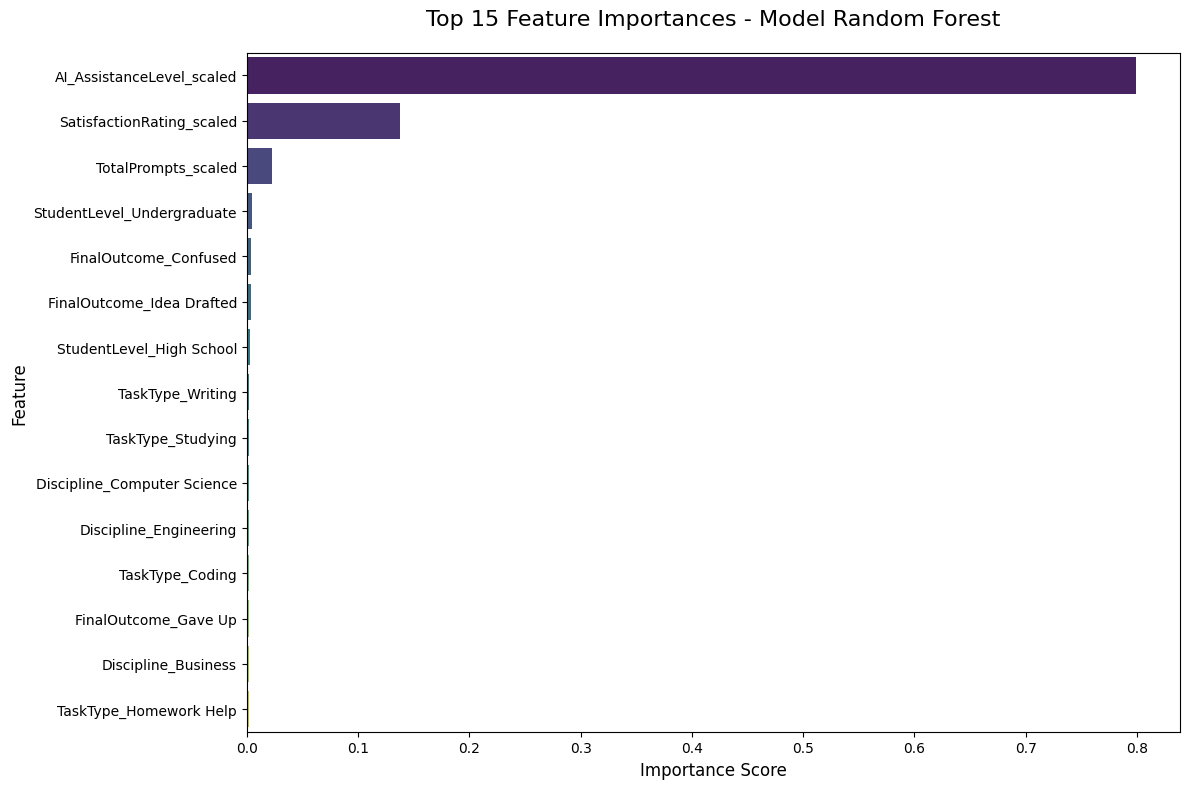


                        🏆 TOP 5 MOST IMPORTANT FEATURES                         
────────────────────────────────────────────────────────────────────────────────


,Feature,Importance
0,AI_AssistanceLevel_scaled,0.798768
1,SatisfactionRating_scaled,0.137652
2,TotalPrompts_scaled,0.022943
3,StudentLevel_Undergraduate,0.004322
4,FinalOutcome_Confused,0.003755



                                   💡 INSIGHTS                                   
────────────────────────────────────────────────────────────────────────────────
✅ Fitur 'AI_AssistanceLevel_scaled' adalah prediktor paling kuat dalam model ini.
   Model sangat bergantung pada fitur ini untuk membuat keputusan.
✅ Fitur dengan importance rendah mungkin bisa dipertimbangkan untuk dihilangkan
   pada iterasi model berikutnya untuk menyederhanakan model.



In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("🎯 FEATURE IMPORTANCE ANALYSIS".center(80))
print("="*80)

# Pastikan model terbaik sudah tersedia dari sel sebelumnya
if 'best_final_model' in globals():
    print(f"🔬 Menganalisis fitur penting dari model: '{best_model_name}'")

    # 1. Ekstrak nilai importance dari model
    # Cek apakah model memiliki atribut 'feature_importances_' (untuk model pohon seperti Random Forest)
    if hasattr(best_final_model, 'feature_importances_'):
        importances = best_final_model.feature_importances_
    # Cek apakah model memiliki atribut 'coef_' (untuk model linear seperti Logistic Regression)
    elif hasattr(best_final_model, 'coef_'):
        # Untuk klasifikasi multi-kelas, kita ambil rata-rata nilai absolut dari koefisien
        if best_final_model.coef_.ndim > 1:
            importances = np.mean(np.abs(best_final_model.coef_), axis=0)
        else:
            importances = np.abs(best_final_model.coef_[0])
    else:
        print(f"❌ Model '{best_model_name}' tidak mendukung ekstraksi feature importance secara langsung.")
        importances = None

    if importances is not None:
        # 2. Buat DataFrame untuk memetakan fitur dengan nilainya
        feature_names = X_train.columns
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })

        # 3. Urutkan fitur dari yang paling penting
        importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

        # 4. Visualisasikan Feature Importance
        print(f"\n{'📊 VISUALIZATION OF TOP FEATURES':^80}")
        print("─" * 80)

        plt.figure(figsize=(12, 8))
        # Ambil 15 fitur teratas untuk visualisasi agar tidak terlalu ramai
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
        plt.title(f'Top 15 Feature Importances - Model {best_model_name}', fontsize=16, pad=20)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.tight_layout()
        plt.show()

        # 5. Tampilkan daftar fitur teratas dan berikan insight
        print(f"\n{'🏆 TOP 5 MOST IMPORTANT FEATURES':^80}")
        print("─" * 80)
        # Tampilkan 5 fitur teratas dalam bentuk tabel
        display(importance_df.head(5))

        print(f"\n{'💡 INSIGHTS':^80}")
        print("─" * 80)
        top_feature = importance_df['Feature'][0]
        print(f"✅ Fitur '{top_feature}' adalah prediktor paling kuat dalam model ini.")
        print("   Model sangat bergantung pada fitur ini untuk membuat keputusan.")
        print("✅ Fitur dengan importance rendah mungkin bisa dipertimbangkan untuk dihilangkan")
        print("   pada iterasi model berikutnya untuk menyederhanakan model.")

else:
    print("❌ Variabel 'best_final_model' tidak ditemukan. Pastikan sel training model sudah dijalankan.")

print("\n" + "="*80)

# **PREDICTION EXAMPLES**

Bagian **🔮 PREDICTION EXAMPLES** ini fungsinya untuk memberikan contoh nyata hasil prediksi model di data uji, supaya kita bisa secara cepat melihat kinerja model di level individual, bukan hanya angka metrik keseluruhan.


---

### 🔮 Prediction Examples – Contoh Prediksi Model

1. **Pengambilan Sampel**

   * Dipilih maksimal 10 data acak dari `X_test` untuk ditampilkan.

2. **Informasi yang Ditampilkan**

   * **Actual** → label sebenarnya.
   * **Predicted** → label yang diprediksi model.
   * **Confidence** → probabilitas prediksi tertinggi (jika tersedia).
   * **Status** → tanda ✅ jika benar, ❌ jika salah.

3. **Tujuan**

   * Mempermudah interpretasi kinerja model.
   * Melihat contoh di mana model benar dan salah prediksi.
   * Memahami tingkat kepercayaan model pada prediksinya.



In [59]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import GridSearchCV

print("\n" + "="*70)
print("🔮 PREDICTION EXAMPLES (with Discipline)".center(70))
print("="*70)

# Pastikan semua objek preprocessing (scaler, encoders, dll.) tersedia dari sel sebelumnya

sample_data = {
    'StudentLevel': [
        'Undergraduate',
        'High School',
        'Graduate',
        'Graduate',
        'Undergraduate',
        'Undergraduate'
    ],
    'Discipline': [
        'Biology',
        'Business',
        'CS',
        'History',
        'Psychology',
        'Engineering'
    ],
    'TaskType': [
        'Writing',
        'Brainstorming',
        'Coding',
        'Studying',
        'Research',
        'Homework Help'
    ],
    'TotalPrompts': [
        15,
        8,
        6,
        20,
        12,
        18
    ],
    'FinalOutcome': [
        'Idea Drafted',
        'Confused',
        'Assignment Completed',
        'Assignment Completed',
        'Gave Up',
        'Assignment Completed'
    ],
    'AI_AssistanceLevel': [
        3,
        2,
        5,
        5,
        1,
        4
    ],
    'SatisfactionRating': [
        3.2,
        3.0,
        4.8,
        3.9,
        1.9,
        4.2
    ]
}


# Tambahkan contoh lain
sample_data['StudentLevel'].append('Undergraduate')
sample_data['Discipline'].append('Biology')
sample_data['TaskType'].append('Writing')
sample_data['TotalPrompts'].append(15)
sample_data['FinalOutcome'].append('Idea Drafted')
sample_data['AI_AssistanceLevel'].append(3)
sample_data['SatisfactionRating'].append(3.2)

sample_data['StudentLevel'].append('High School')
sample_data['Discipline'].append('Business')
sample_data['TaskType'].append('Brainstorming')
sample_data['TotalPrompts'].append(6)
sample_data['FinalOutcome'].append('Confused')
sample_data['AI_AssistanceLevel'].append(2)
sample_data['SatisfactionRating'].append(3.0)

sample_data['StudentLevel'].append('Graduate')
sample_data['Discipline'].append('CS')
sample_data['TaskType'].append('Coding')
sample_data['TotalPrompts'].append(8)
sample_data['FinalOutcome'].append('Assignment Completed')
sample_data['AI_AssistanceLevel'].append(5)
sample_data['SatisfactionRating'].append(4.8)

sample_data['StudentLevel'].append('High School')
sample_data['Discipline'].append('History')
sample_data['TaskType'].append('Studying')
sample_data['TotalPrompts'].append(20)
sample_data['FinalOutcome'].append('Assignment Completed')
sample_data['AI_AssistanceLevel'].append(5)
sample_data['SatisfactionRating'].append(3.9)

sample_data['StudentLevel'].append('Undergraduate')
sample_data['Discipline'].append('Psychology')
sample_data['TaskType'].append('Research')
sample_data['TotalPrompts'].append(12)
sample_data['FinalOutcome'].append('Gave Up')
sample_data['AI_AssistanceLevel'].append(1)
sample_data['SatisfactionRating'].append(1.9)

sample_data['StudentLevel'].append('Undergraduate')
sample_data['Discipline'].append('Engineering')
sample_data['TaskType'].append('Homework Help')
sample_data['TotalPrompts'].append(18)
sample_data['FinalOutcome'].append('Assignment Completed')
sample_data['AI_AssistanceLevel'].append(4)
sample_data['SatisfactionRating'].append(4.2)

sample_df = pd.DataFrame(sample_data)

print("🔬 Data Sampel Mentah untuk Prediksi:")
display(sample_df)


# 2. Terapkan PREPROCESSING YANG SAMA PERSIS seperti pada data training
# Exclude SessionLengthMin from numerical features
exclude_cols = ['SessionLengthMin']

# Identify categorical and numerical columns based on the original DataFrame's dtypes
# This assumes the original df and categorical_cols, numerical_cols lists are still in scope
# It's safer to re-identify or ensure they are globally available if the kernel restarts
if 'df' in globals():
    original_categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    original_numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
else:
    print("⚠️ Original DataFrame 'df' not found. Cannot reliably identify column types for sample data.")
    # Attempt to proceed with best guess based on sample_df columns
    original_categorical_cols = sample_df.select_dtypes(include=['object']).columns.tolist()
    original_numerical_cols = sample_df.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Filter features for the sample data based on what was used for training
# Need to ensure 'categorical_features', 'numerical_features', 'target_col', 'scaler', 'le_target'
# are available from previous cells (Feature Engineering and Target Variable Prep)
if 'categorical_features' in globals() and 'numerical_features' in globals() and 'target_col' in globals() and 'scaler' in globals() and 'le_target' in globals():

    sample_cat_features = [col for col in categorical_features if col in sample_df.columns]
    sample_num_features = [col for col in numerical_features if col in sample_df.columns and col not in exclude_cols]

    # One-Hot Encode features present in sample_df and used in training
    # Make sure to get all possible categories from the original training data if possible
    # (This is a simplification; a robust solution would store the OneHotEncoder fitted on training data)
    encoded_sample = pd.get_dummies(sample_df[sample_cat_features], drop_first=True)


    # Scaling numerical features using the scaler fitted on the training data
    # Check if numerical features exist in the sample and were used in training
    if sample_num_features:
        scaled_sample_data = scaler.transform(sample_df[sample_num_features])
        scaled_sample_df = pd.DataFrame(scaled_sample_data, columns=[f"{col}_scaled" for col in sample_num_features])
    else:
         scaled_sample_df = pd.DataFrame(index=sample_df.index)


    # Combine processed features
    processed_sample = pd.concat([encoded_sample, scaled_sample_df], axis=1)

    # 3. ALIGN COLUMNS: Samakan kolom dengan data training (X_train)
    # Need to ensure X_train is available from the Train-Test Split cell
    if 'X_train' in globals():
        original_training_cols = X_train.columns
        processed_sample = processed_sample.reindex(columns=original_training_cols, fill_value=0)

        print("\nProcessed Sample Data (siap untuk diprediksi oleh model):")
        print(f"Shape: {processed_sample.shape}")


        # 4. Lakukan Prediksi menggunakan model terbaik hasil tuning (atau original jika tuning skipped)
        # Need best_model_name and model_results from Model Training/Tuning cells
        if 'best_model_name' in globals() and best_model_name in model_results:
            # Retrieve the actual trained model object using the best model name
            if f"{best_model_name} (Tuned)" in model_results:
                 best_final_model = model_results[f"{best_model_name} (Tuned)"]['model']
                 print(f"Using tuned model: {best_model_name} (Tuned)")
            else:
                 best_final_model = model_results[best_model_name]['model']
                 print(f"Using original model: {best_model_name}")


            predictions_numeric = best_final_model.predict(processed_sample)

            # Check if the model has predict_proba before calling it
            if hasattr(best_final_model, 'predict_proba'):
                 predictions_proba = best_final_model.predict_proba(processed_sample)
                 # Ubah prediksi numerik kembali ke label asli
                 predicted_labels = le_target.inverse_transform(predictions_numeric)

                 # 5. Tampilkan Hasil Prediksi dengan Jelas
                 prediction_results = sample_df.copy()
                 prediction_results[f'Predicted_Outcome {target_col}'] = predicted_labels

                 for i, class_name in enumerate(le_target.classes_):
                     prediction_results[f'Prob_{class_name}'] = predictions_proba[:, i]

                 print("\n" + "="*120)
                 print("✅ HASIL PREDIKSI".center(120))
                 print("="*120)

                 display(prediction_results.style.background_gradient(
                     subset = [f'Predicted_Outcome {target_col}'], cmap='viridis'
                 ).format(
                     {col: '{:.2%}' for col in prediction_results.columns if 'Prob_' in col}
                 ))

            else:
                print(f"❌ Model {type(best_final_model).__name__} does not support probability prediction.")
                # Display predictions without probability
                predicted_labels = le_target.inverse_transform(predictions_numeric)
                prediction_results = sample_df.copy()
                prediction_results[f'Predicted_Outcome {target_col}'] = predicted_labels
                print("\n" + "="*120)
                print("✅ HASIL PREDIKSI".center(120))
                print("="*120)
                display(prediction_results.style.background_gradient(
                    subset = [f'Predicted_Outcome {target_col}'], cmap='viridis'
                ))


        else:
             print("❌ Best model or model_results not found. Please run model training and tuning sections.")
    else:
        print("❌ X_train not found. Please run the Train-Test Split section.")
else:
    print("❌ Required preprocessing objects (categorical_features, numerical_features, target_col, scaler, le_target) not found. Please run Feature Engineering and Target Variable Prep.")


               🔮 PREDICTION EXAMPLES (with Discipline)                
🔬 Data Sampel Mentah untuk Prediksi:


,StudentLevel,Discipline,TaskType,TotalPrompts,FinalOutcome,AI_AssistanceLevel,SatisfactionRating
0,Undergraduate,Biology,Writing,15,Idea Drafted,3,3.2
1,High School,Business,Brainstorming,8,Confused,2,3.0
2,Graduate,CS,Coding,6,Assignment Completed,5,4.8
3,Graduate,History,Studying,20,Assignment Completed,5,3.9
4,Undergraduate,Psychology,Research,12,Gave Up,1,1.9
5,Undergraduate,Engineering,Homework Help,18,Assignment Completed,4,4.2
6,Undergraduate,Biology,Writing,15,Idea Drafted,3,3.2
7,High School,Business,Brainstorming,6,Confused,2,3.0
8,Graduate,CS,Coding,8,Assignment Completed,5,4.8
9,High School,History,Studying,20,Assignment Completed,5,3.9



Processed Sample Data (siap untuk diprediksi oleh model):
Shape: (12, 19)
Using original model: Random Forest

                                                    ✅ HASIL PREDIKSI                                                    


,StudentLevel,Discipline,TaskType,TotalPrompts,FinalOutcome,AI_AssistanceLevel,SatisfactionRating,Predicted_Outcome AI_AssistanceLevel,Prob_1,Prob_2,Prob_3,Prob_4,Prob_5
0,Undergraduate,Biology,Writing,15,Idea Drafted,3,3.200000,3,0.00%,1.00%,99.00%,0.00%,0.00%
1,High School,Business,Brainstorming,8,Confused,2,3.000000,2,0.00%,89.00%,9.00%,1.00%,1.00%
2,Graduate,CS,Coding,6,Assignment Completed,5,4.800000,5,0.00%,0.00%,0.00%,3.00%,97.00%
3,Graduate,History,Studying,20,Assignment Completed,5,3.900000,5,0.00%,0.00%,0.00%,6.00%,94.00%
4,Undergraduate,Psychology,Research,12,Gave Up,1,1.900000,2,43.00%,49.00%,8.00%,0.00%,0.00%
5,Undergraduate,Engineering,Homework Help,18,Assignment Completed,4,4.200000,4,0.00%,0.00%,0.00%,100.00%,0.00%
6,Undergraduate,Biology,Writing,15,Idea Drafted,3,3.200000,3,0.00%,1.00%,99.00%,0.00%,0.00%
7,High School,Business,Brainstorming,6,Confused,2,3.000000,2,0.00%,88.00%,11.00%,0.00%,1.00%
8,Graduate,CS,Coding,8,Assignment Completed,5,4.800000,5,0.00%,0.00%,0.00%,3.00%,97.00%
9,High School,History,Studying,20,Assignment Completed,5,3.900000,5,0.00%,0.00%,0.00%,3.00%,97.00%


# **SUMMARY AND INSIGHTS**


🎯 **Main point:** Kode ini menampilkan laporan akhir performa **model terbaik setelah hyperparameter tuning**, lengkap dengan info dataset dan metrik evaluasi.

1. **Menyimpan hasil metrik terbaik dari model yang sudah di-*tuning***
   (`tuned_accuracy`, `tuned_f1_score`, `tuned_precision`, `tuned_recall`).

2. **Membuat ringkasan dataset**

   * Target variabel
   * Jumlah sampel
   * Jumlah fitur
   * Kelas yang ada.

3. **Membuat ringkasan performa model terbaik setelah tuning**

   * Nama model terbaik
   * Nilai akurasi, F1, precision, recall
   * Rata-rata dan standar deviasi dari *cross-validation*.

4. **Menampilkan ringkasan**

   * Informasi dataset
   * Performa model hasil tuning.

5. **(Opsional)** Menampilkan **10 fitur terpenting** jika model mendukung *feature importance*.


In [73]:
print("\n" + "="*80)
print("📊 SUMMARY AND INSIGHTS".center(80))
print("="*80)

# Pastikan ada model yang dilatih
if not model_results:
    print("❌ No models were successfully trained. Cannot provide insights.")
else:
    print(f"\n{'🎯 OVERALL PERFORMANCE SUMMARY':^80}")
    print("─" * 80)

    # Model performance ranking
    successful_models = [name for name in model_results.keys() if model_results[name]['accuracy'] is not None]
    print(f"✅ Successfully trained models: {len(successful_models)}")
    print(f"🏆 Best performing model: {best_model_name}")
    print(f"📈 Final accuracy achieved: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
    print(f"📊 Final F1-Score achieved: {final_f1:.4f}")

    # Performance categories
    if final_accuracy >= 0.95:
        performance_category = "🌟 EXCELLENT"
        performance_desc = "Outstanding performance - ready for production"
    elif final_accuracy >= 0.90:
        performance_category = "✅ VERY GOOD"
        performance_desc = "High performance - suitable for most applications"
    elif final_accuracy >= 0.85:
        performance_category = "👍 GOOD"
        performance_desc = "Solid performance - may need minor improvements"
    elif final_accuracy >= 0.75:
        performance_category = "⚠️  FAIR"
        performance_desc = "Moderate performance - requires optimization"
    else:
        performance_category = "❌ POOR"
        performance_desc = "Low performance - significant improvements needed"

    print(f"🎖️  Performance Rating: {performance_category}")
    print(f"💭 Assessment: {performance_desc}")

    print(f"\n{'📈 MODEL COMPARISON INSIGHTS':^80}")
    print("─" * 80)

    # Sort models by accuracy for comparison
    model_comparison = []
    for name, results in model_results.items():
        if results['accuracy'] is not None:
            model_comparison.append({
                'name': name,
                'accuracy': results['accuracy'],
                'f1_score': results['f1_score'],
                'cv_mean': results['cv_mean'],
                'cv_std': results['cv_std']
            })

    model_comparison.sort(key=lambda x: x['accuracy'], reverse=True)

    if len(model_comparison) > 1:
        best_model_comp = model_comparison[0]
        worst_model_comp = model_comparison[-1]
        accuracy_gap = best_model_comp['accuracy'] - worst_model_comp['accuracy']

        print(f"🥇 Best model: {best_model_comp['name']} (Acc: {best_model_comp['accuracy']:.4f})")
        print(f"🥉 Worst model: {worst_model_comp['name']} (Acc: {worst_model_comp['accuracy']:.4f})")
        print(f"📊 Performance gap: {accuracy_gap:.4f} ({accuracy_gap*100:.2f} percentage points)")

        # Stability analysis
        most_stable = min(model_comparison, key=lambda x: x['cv_std'])
        least_stable = max(model_comparison, key=lambda x: x['cv_std'])

        print(f"🎯 Most stable model: {most_stable['name']} (CV Std: {most_stable['cv_std']:.4f})")
        print(f"📈 Least stable model: {least_stable['name']} (CV Std: {least_stable['cv_std']:.4f})")

    print(f"\n{'🔧 HYPERPARAMETER TUNING INSIGHTS':^80}")
    print("─" * 80)

    # Check if tuning was performed and beneficial
    tuning_performed = False
    tuning_beneficial = False

    if f"{best_model_name} (Tuned)" in model_results:
        tuning_performed = True
        original_acc = model_results[best_model_name]['accuracy']
        tuned_acc = final_accuracy
        improvement = tuned_acc - original_acc

        if improvement > 0:
            tuning_beneficial = True
            print(f"✅ Hyperparameter tuning was SUCCESSFUL")
            print(f"📈 Accuracy improvement: +{improvement:.4f} ({improvement*100:.2f}%)")
            print(f"💡 Recommendation: Use the tuned model for final deployment")
        else:
            print(f"⚠️  Hyperparameter tuning did NOT improve performance")
            print(f"📊 Accuracy change: {improvement:+.4f} ({improvement*100:.2f}%)")
            print(f"💡 Recommendation: Original model parameters are already optimal")
    elif best_accuracy >= 0.99:
        print(f"⚡ Hyperparameter tuning was SKIPPED - model already near-perfect")
        print(f"🎯 Current accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
        print(f"💡 Recommendation: No further tuning needed")
    else:
        print(f"❓ Hyperparameter tuning status unclear")
        print(f"💡 Recommendation: Consider manual hyperparameter optimization")

    # Add Feature Importance insights
    print(f"\n{'📊 FEATURE IMPORTANCE INSIGHTS':^80}")
    print("─" * 80)

    # Check if feature importance was calculated and available
    if 'importance_df' in globals() and not importance_df.empty:
        print(f"🔬 Top Features influencing the model ({best_model_name}):")
        # Display top N features, e.g., top 5
        top_n_features = 5
        display(importance_df.head(top_n_features).style.set_properties(**{
            'background-color': '#f0f0f0',
            'color': 'black',
            'border': '1px solid black'
        }).set_table_styles([{
            'selector': 'th',
            'props': [('background-color', '#96CEB4'), ('color', 'white'), ('font-weight', 'bold')]
        }]).format({'Importance': '{:.4f}'}))

        top_feature_name = importance_df['Feature'].iloc[0]
        top_feature_importance = importance_df['Importance'].iloc[0]
        print(f"✅ The most important feature is '{top_feature_name}' with an importance score of {top_feature_importance:.4f}.")
        print("💡 Features with higher importance have a stronger influence on the model's predictions.")
        print("💡 Features with very low importance might be candidates for removal in future iterations.")
    else:
        print("⚠️ Feature Importance analysis results not found. Please run the FEATURE IMPORTANCE section.")


    print(f"\n{'🎯 KEY INSIGHTS & RECOMMENDATIONS':^80}")
    print("─" * 80)

    insights = []

    # Data size insights
    training_size = X_train.shape[0] if 'X_train' in globals() else 0
    feature_count = X_processed.shape[1] if 'X_processed' in globals() else 0

    if training_size > 0 and feature_count > 0:
        data_ratio = training_size / feature_count
        if data_ratio < 10:
            insights.append("⚠️  Dataset may be too small relative to features - consider feature selection or more data")
        elif data_ratio > 100:
            insights.append("✅ Good data-to-features ratio - sufficient for reliable training")

    # Model complexity insights
    if best_model_name == 'Decision Tree' and final_accuracy > 0.95:
        insights.append("🌟 Decision Tree achieved high accuracy - data likely has clear patterns")
    elif best_model_name == 'Random Forest' and final_accuracy > 0.90:
        insights.append("🌲 Random Forest performed well - good balance of accuracy and robustness")
    elif best_model_name == 'Support Vector Machine' and final_accuracy > 0.90:
        insights.append("🎯 SVM excelled - data likely has good class separation")
    elif best_model_name == 'Logistic Regression' and final_accuracy > 0.85:
        insights.append("📊 Logistic Regression succeeded - relationships are likely linear")

    # Business impact insights
    if final_accuracy >= 0.95:
        insights.append("💼 Model ready for production deployment with high confidence")
    elif final_accuracy >= 0.85:
        insights.append("💼 Model suitable for production with monitoring and validation")
    else:
        insights.append("💼 Model needs improvement before production deployment")

    # Print all insights
    for i, insight in enumerate(insights, 1):
        print(f"{i:2d}. {insight}")

    print(f"\n{'🚀 NEXT STEPS':^80}")
    print("─" * 80)

    next_steps = []

    if final_accuracy < 0.85:
        next_steps.append("🔍 Perform feature engineering and selection")
        next_steps.append("📊 Analyze misclassified examples")
        next_steps.append("🔧 Try ensemble methods or advanced algorithms")
        next_steps.append("📈 Consider collecting more training data")
    elif final_accuracy < 0.95:
        next_steps.append("🎯 Fine-tune hyperparameters further")
        next_steps.append("📊 Analyze edge cases and outliers")
        next_steps.append("🔍 Consider feature interactions")
    else:
        next_steps.append("✅ Validate on additional test sets")
        next_steps.append("📊 Create confusion matrix and error analysis")
        next_steps.append("🚀 Prepare for production deployment")
        next_steps.append("📈 Set up monitoring and retraining pipeline")

    # Always include these
    next_steps.extend([
        "📋 Document model assumptions and limitations",
        "🔒 Implement model versioning and backup",
        "📊 Create performance monitoring dashboard"
    ])

    for i, step in enumerate(next_steps, 1):
        print(f"{i:2d}. {step}")

    print(f"\n{'⚡ FINAL VERDICT':^80}")
    print("─" * 80)

    if final_accuracy >= 0.95 and final_f1 >= 0.95:
        verdict = "🌟 EXCELLENT - Model exceeds expectations and is production-ready"
    elif final_accuracy >= 0.90 and final_f1 >= 0.85:
        verdict = "✅ VERY GOOD - Model meets requirements with minor monitoring needs"
    elif final_accuracy >= 0.80 and final_f1 >= 0.75:
        verdict = "👍 ACCEPTABLE - Model is usable but may need improvements"
    else:
        verdict = "⚠️  NEEDS IMPROVEMENT - Model requires significant optimization"

    print(f"🎯 {verdict}")

    # Risk assessment
    risk_level = "LOW" if 'final_cv_mean' in globals() and final_cv_mean < 0.03 else "MEDIUM" if 'final_cv_mean' in globals() and final_cv_mean < 0.07 else "HIGH" if 'final_cv_mean' in globals() else "N/A"
    print(f"⚠️  Deployment Risk: {risk_level}")
    print(f"🎖️  Confidence Level: {final_accuracy*100:.1f}%")

print("\n" + "="*80)
print("📝 Analysis completed successfully! Review insights above for next steps.")
print("="*80)


                             📊 SUMMARY AND INSIGHTS                             

                         🎯 OVERALL PERFORMANCE SUMMARY                          
────────────────────────────────────────────────────────────────────────────────
✅ Successfully trained models: 4
🏆 Best performing model: Random Forest
📈 Final accuracy achieved: 1.0000 (100.00%)
📊 Final F1-Score achieved: 1.0000
🎖️  Performance Rating: 🌟 EXCELLENT
💭 Assessment: Outstanding performance - ready for production

                          📈 MODEL COMPARISON INSIGHTS                           
────────────────────────────────────────────────────────────────────────────────
🥇 Best model: Random Forest (Acc: 1.0000)
🥉 Worst model: K-Nearest Neighbors (Acc: 0.9675)
📊 Performance gap: 0.0325 (3.25 percentage points)
🎯 Most stable model: Logistic Regression (CV Std: 0.0000)
📈 Least stable model: K-Nearest Neighbors (CV Std: 0.0046)

                        🔧 HYPERPARAMETER TUNING INSIGHTS                        
────

,Feature,Importance
0,AI_AssistanceLevel_scaled,0.7988
1,SatisfactionRating_scaled,0.1377
2,TotalPrompts_scaled,0.0229
3,StudentLevel_Undergraduate,0.0043
4,FinalOutcome_Confused,0.0038


✅ The most important feature is 'AI_AssistanceLevel_scaled' with an importance score of 0.7988.
💡 Features with higher importance have a stronger influence on the model's predictions.
💡 Features with very low importance might be candidates for removal in future iterations.

                        🎯 KEY INSIGHTS & RECOMMENDATIONS                        
────────────────────────────────────────────────────────────────────────────────
 1. ✅ Good data-to-features ratio - sufficient for reliable training
 2. 🌲 Random Forest performed well - good balance of accuracy and robustness
 3. 💼 Model ready for production deployment with high confidence

                                  🚀 NEXT STEPS                                  
────────────────────────────────────────────────────────────────────────────────
 1. ✅ Validate on additional test sets
 2. 📊 Create confusion matrix and error analysis
 3. 🚀 Prepare for production deployment
 4. 📈 Set up monitoring and retraining pipeline
 5. 📋 Documen

# **PREDICTION ANALYSIS**


                     📊 PREDICTION ANALYSIS & VISUALIZATIONS                     

📈 2. ANALISIS PROBABILITAS PREDIKSI


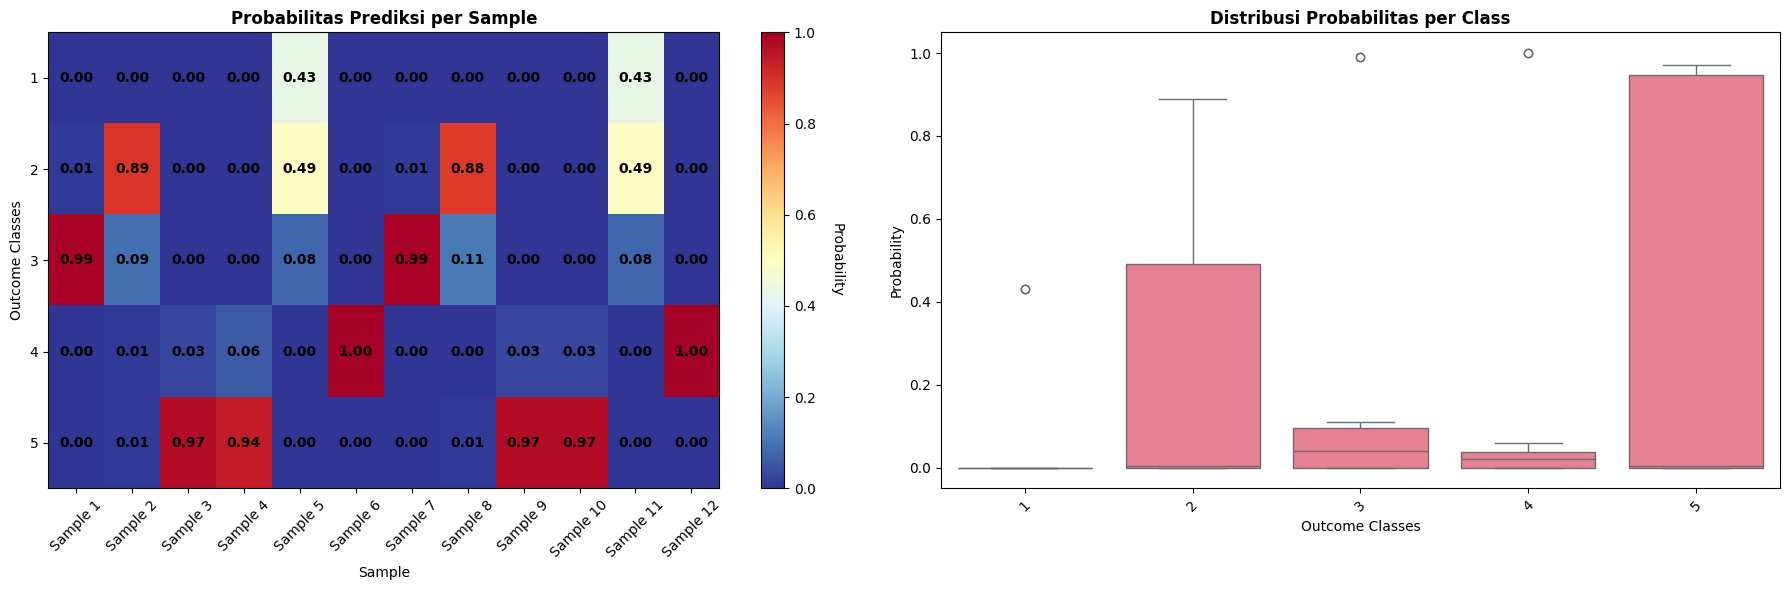


🎯 3. ANALISIS CONFIDENCE PREDIKSI


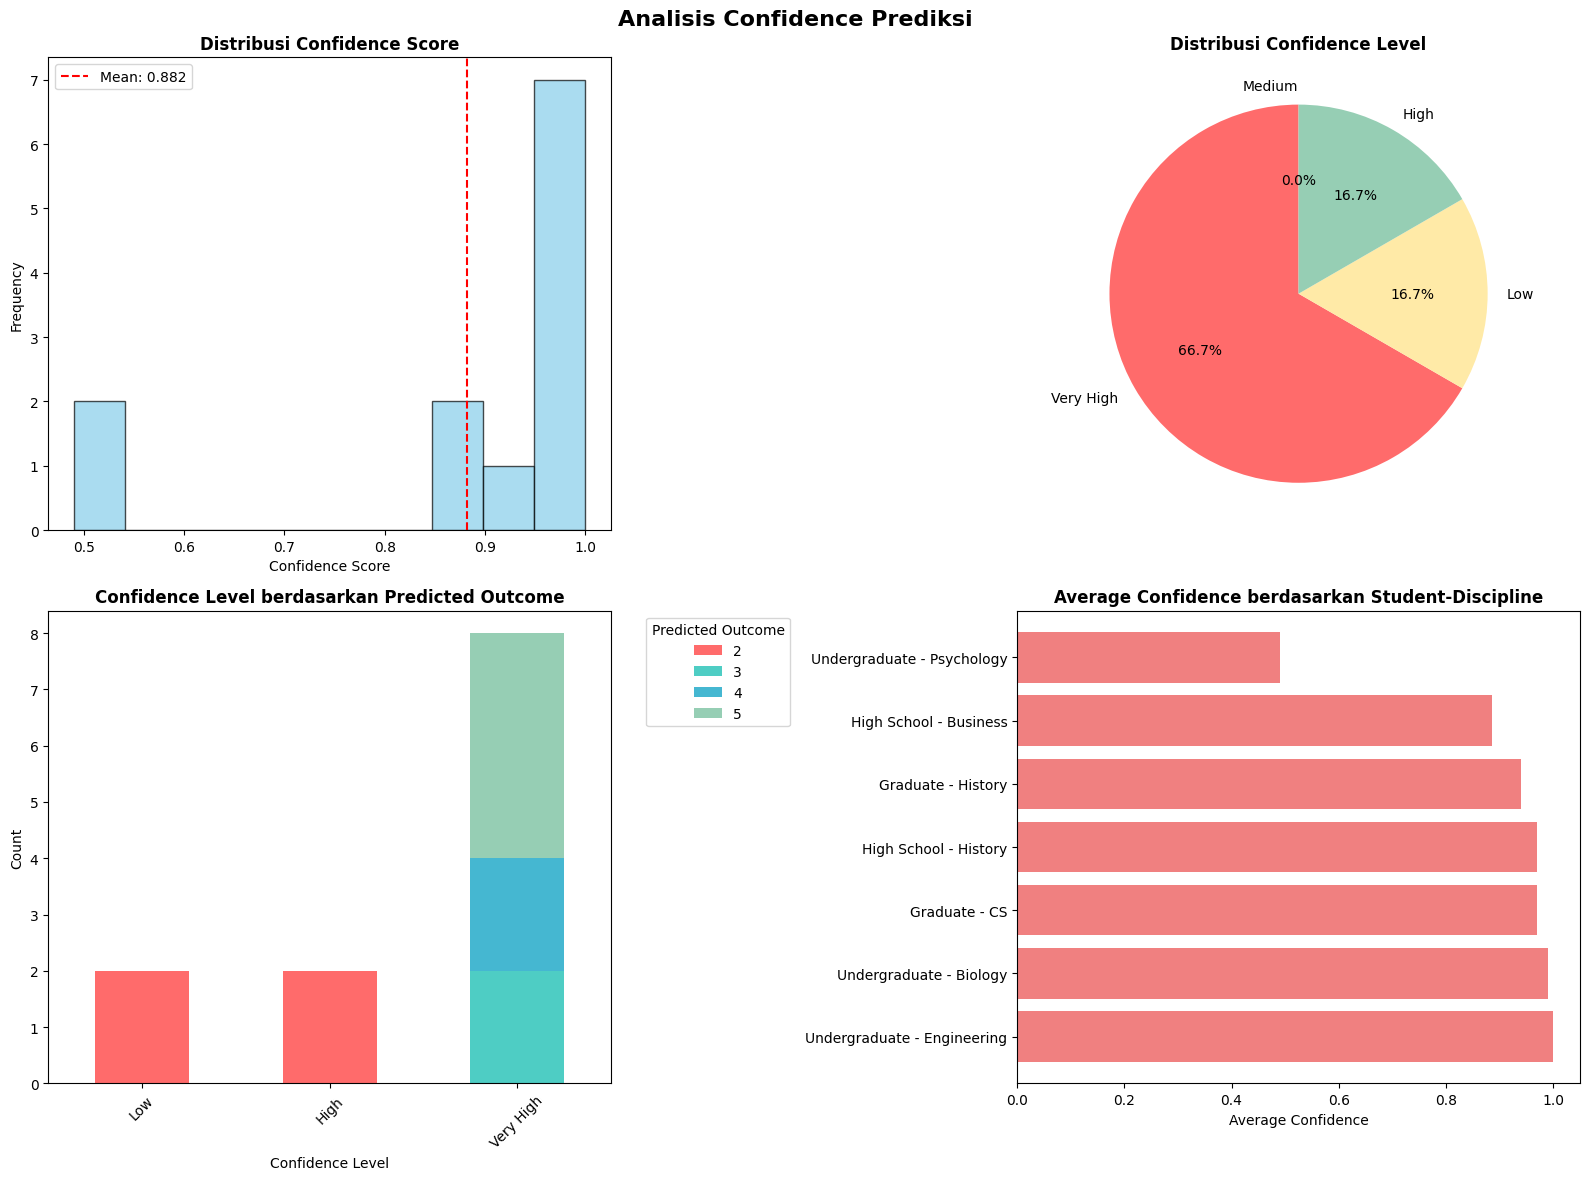


📋 5. RINGKASAN STATISTIK PREDIKSI


,Metric,Value
0,Total Predictions,12
1,Unique Outcomes Predicted,4
2,Most Common Outcome,2
3,Average Confidence,0.882
4,High Confidence Predictions (>0.75),10



✅ PREDICTION ANALYSIS COMPLETED!


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("📊 PREDICTION ANALYSIS & VISUALIZATIONS".center(80))
print("="*80)

# Set style untuk matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Pastikan prediction_results tersedia dari sel sebelumnya
if 'prediction_results' in globals():

    # 1. ANALISIS PROBABILITAS PREDIKSI
    print("\n📈 2. ANALISIS PROBABILITAS PREDIKSI")

    # Ambil kolom probabilitas
    prob_cols = [col for col in prediction_results.columns if col.startswith('Prob_')]

    if prob_cols:
        # Heatmap Probabilitas
        fig, axes = plt.subplots(1, 2, figsize=(18, 6))

        # Heatmap 1: Probabilitas per Sample
        prob_data = prediction_results[prob_cols].values
        sample_labels = [f"Sample {i+1}" for i in range(len(prediction_results))]
        class_labels = [col.replace('Prob_', '') for col in prob_cols]

        im1 = axes[0].imshow(prob_data.T, cmap='RdYlBu_r', aspect='auto')
        axes[0].set_title('Probabilitas Prediksi per Sample', fontweight='bold')
        axes[0].set_xlabel('Sample')
        axes[0].set_ylabel('Outcome Classes')
        axes[0].set_xticks(range(len(sample_labels)))
        axes[0].set_xticklabels(sample_labels, rotation=45)
        axes[0].set_yticks(range(len(class_labels)))
        axes[0].set_yticklabels(class_labels)

        # Tambahkan colorbar
        cbar1 = plt.colorbar(im1, ax=axes[0])
        cbar1.set_label('Probability', rotation=270, labelpad=20)

        # Tambahkan nilai di dalam heatmap
        for i in range(len(class_labels)):
            for j in range(len(sample_labels)):
                text = axes[0].text(j, i, f'{prob_data[j, i]:.2f}',
                                   ha="center", va="center", color="black", fontweight='bold')

        # Boxplot Distribusi Probabilitas
        prob_df_melted = prediction_results[prob_cols].melt(var_name='Class', value_name='Probability')
        prob_df_melted['Class'] = prob_df_melted['Class'].str.replace('Prob_', '')

        sns.boxplot(data=prob_df_melted, x='Class', y='Probability', ax=axes[1])
        axes[1].set_title('Distribusi Probabilitas per Class', fontweight='bold')
        axes[1].set_xlabel('Outcome Classes')
        axes[1].set_ylabel('Probability')
        axes[1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        # 3. CONFIDENCE ANALYSIS
        print("\n🎯 3. ANALISIS CONFIDENCE PREDIKSI")

        # Hitung max probability sebagai confidence score
        prediction_results['Confidence'] = prediction_results[prob_cols].max(axis=1)
        prediction_results['Confidence_Level'] = pd.cut(prediction_results['Confidence'],
                                                       bins=[0, 0.5, 0.75, 0.9, 1.0],
                                                       labels=['Low', 'Medium', 'High', 'Very High'])

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Analisis Confidence Prediksi', fontsize=16, fontweight='bold')

        # Subplot 1: Distribusi Confidence Score
        axes[0,0].hist(prediction_results['Confidence'], bins=10, color='skyblue', alpha=0.7, edgecolor='black')
        axes[0,0].set_title('Distribusi Confidence Score', fontweight='bold')
        axes[0,0].set_xlabel('Confidence Score')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].axvline(prediction_results['Confidence'].mean(), color='red', linestyle='--',
                         label=f'Mean: {prediction_results["Confidence"].mean():.3f}')
        axes[0,0].legend()

        # Subplot 2: Confidence Level Distribution
        conf_counts = prediction_results['Confidence_Level'].value_counts()
        axes[0,1].pie(conf_counts.values, labels=conf_counts.index, autopct='%1.1f%%',
                     colors=['#FF6B6B', '#FFEAA7', '#96CEB4', '#4ECDC4'], startangle=90)
        axes[0,1].set_title('Distribusi Confidence Level', fontweight='bold')

        # Subplot 3: Confidence vs Predicted Outcome
        conf_outcome = pd.crosstab(prediction_results['Confidence_Level'],
                                  prediction_results[predicted_col])
        conf_outcome.plot(kind='bar', ax=axes[1,0], stacked=True,
                         color=colors[:len(conf_outcome.columns)])
        axes[1,0].set_title('Confidence Level berdasarkan Predicted Outcome', fontweight='bold')
        axes[1,0].set_xlabel('Confidence Level')
        axes[1,0].set_ylabel('Count')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].legend(title='Predicted Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Subplot 4: Confidence vs Student Characteristics
        prediction_results['StudentLevel_Discipline'] = (prediction_results['StudentLevel'] +
                                                        ' - ' + prediction_results['Discipline'])

        conf_char = prediction_results.groupby('StudentLevel_Discipline')['Confidence'].mean().sort_values(ascending=False)
        axes[1,1].barh(range(len(conf_char)), conf_char.values, color='lightcoral')
        axes[1,1].set_title('Average Confidence berdasarkan Student-Discipline', fontweight='bold')
        axes[1,1].set_xlabel('Average Confidence')
        axes[1,1].set_yticks(range(len(conf_char)))
        axes[1,1].set_yticklabels(conf_char.index, fontsize=10)

        plt.tight_layout()
        plt.show()


    # 5. SUMMARY STATISTICS
    print("\n📋 5. RINGKASAN STATISTIK PREDIKSI")

    summary_stats = pd.DataFrame({
        'Metric': ['Total Predictions', 'Unique Outcomes Predicted', 'Most Common Outcome',
                  'Average Confidence', 'High Confidence Predictions (>0.75)'],
        'Value': [
            len(prediction_results),
            prediction_results[predicted_col].nunique(),
            prediction_results[predicted_col].mode().iloc[0],
            f"{prediction_results['Confidence'].mean():.3f}" if 'Confidence' in prediction_results else 'N/A',
            f"{len(prediction_results[prediction_results['Confidence'] > 0.75])}" if 'Confidence' in prediction_results else 'N/A'
        ]
    })

    display(summary_stats.style.set_properties(**{
        'background-color': '#f0f0f0',
        'color': 'black',
        'border': '1px solid black'
    }).set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#4ECDC4'), ('color', 'white'), ('font-weight', 'bold')]
    }]))

    print("\n✅ PREDICTION ANALYSIS COMPLETED!")
    print("="*80)

else:
    print("❌ Data 'prediction_results' tidak ditemukan.")
    print("Pastikan sel PREDICTION EXAMPLES telah dijalankan terlebih dahulu.")